# Previsão de Salarios

Vamos supor que o gestor de uma empresa deseja ter mais controle do budget para investir em projetos. Em muito casos existem projetos que solicitam contratação de mais mão de obra. Porém o gestor deve estar atento a não ultrapassar o valor que ele tem dispível para efetuar a contratação do profissional que precisa,  conseguir estimar por sí só seria uma tarefa extramamente difícil e emprecisa, o que pode fazer com que facilmente se estoure o orçamento. A empresa possui uma base de dados de todos os contratado até aquele momento, sendo assim, para que se haja maior controle no orçamento, o gestor gostaria de um modelo de machine learning que seja capaz de prever quanto seria o salário de um novo contratado, assim o gestor consegue traçar com mais precisão o perfil de profissional que ele pode contratar  de modo que não estoure o orçamento.


Tendo em vista o  esquema do banco de dados diponibilizado pela empresa:

```
   age -> Idade do empregado
   experience -> Nível de experência profissional
   job role -> Cargo Ocupado
   education level -> Grau de Educação
   salary -> Salário anual em USD$
```
Primeiramente vamos analisar os dados que temos para identificar todos os pré-processamento necessário e possíveis variáveis a serem eliminadas, posteriormente vamos selecionar os modelos que se enquandram nesse tipo de problema, pefromar o cross-validation, optimizar os hiperparâmetros e em seguida fazer novamente o cross validation novamente. Logo após esssa etapa teremos o modelo com melhor performance e  assim faremos nele uma avalição através do Holdout(treino/test). Por fim treinameremos o melhor modelo selecionado como todos os dado disponbilizados para que assim se possa colocar os modelo treinado em produção para ser utilizado pelo gestor da empresa na hora de estimar os perfis que cabem no seu orçamento.}


In [1]:
import os
import warnings
from google.colab import drive

# Mount Google Drive

drive.mount('/content/drive')
warnings.filterwarnings('ignore')
os.chdir('/content/drive/MyDrive/Estudos/Pos-graduacao - Ciencia de Dados e  Analytics/Sprints/Sprint II - Machine Learning and Advanced Analytics/Previsao Salarios Com  Regresaao/Code')



Mounted at /content/drive


## Análise exploratória e Pré-processamento


Primeiramente vamos analisar os dados que temos para identificar todos os pré-processamento necessário e possíveis variáveis a serem eliminados:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from google.colab import drive


#drive.mount('/content/drive')




#import custom packages
from Preprocessing.CleanData.DataFilter import DataFilter


#Env Vars
from Env.EnvVars import *


In [3]:

salaries_df = pd.read_csv(DATASET_PATH + '/Salary_Data.csv')
salaries_df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [4]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
salaries_df[salaries_df.isnull().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [6]:
#Get out all row that has some NaN value

salaries_df_preprocessed = salaries_df[~salaries_df.isnull().any(axis=1)]

Com intuito de facilitar a ánalise analiseremos primeiros os dados numéricos e depois os categóricos, identificando e realizando os devidos processamentos de dados

### Variáveis Numéricas

A primeira coisa a ser avaliada é a presença de outiliers na variáveis numérica, então iremos plotar os boxplots junto com as funções de desensidade. Assim conseguimos identificar a presença de outliers como também identifica a distribuição das variáveis numéricas no dataset

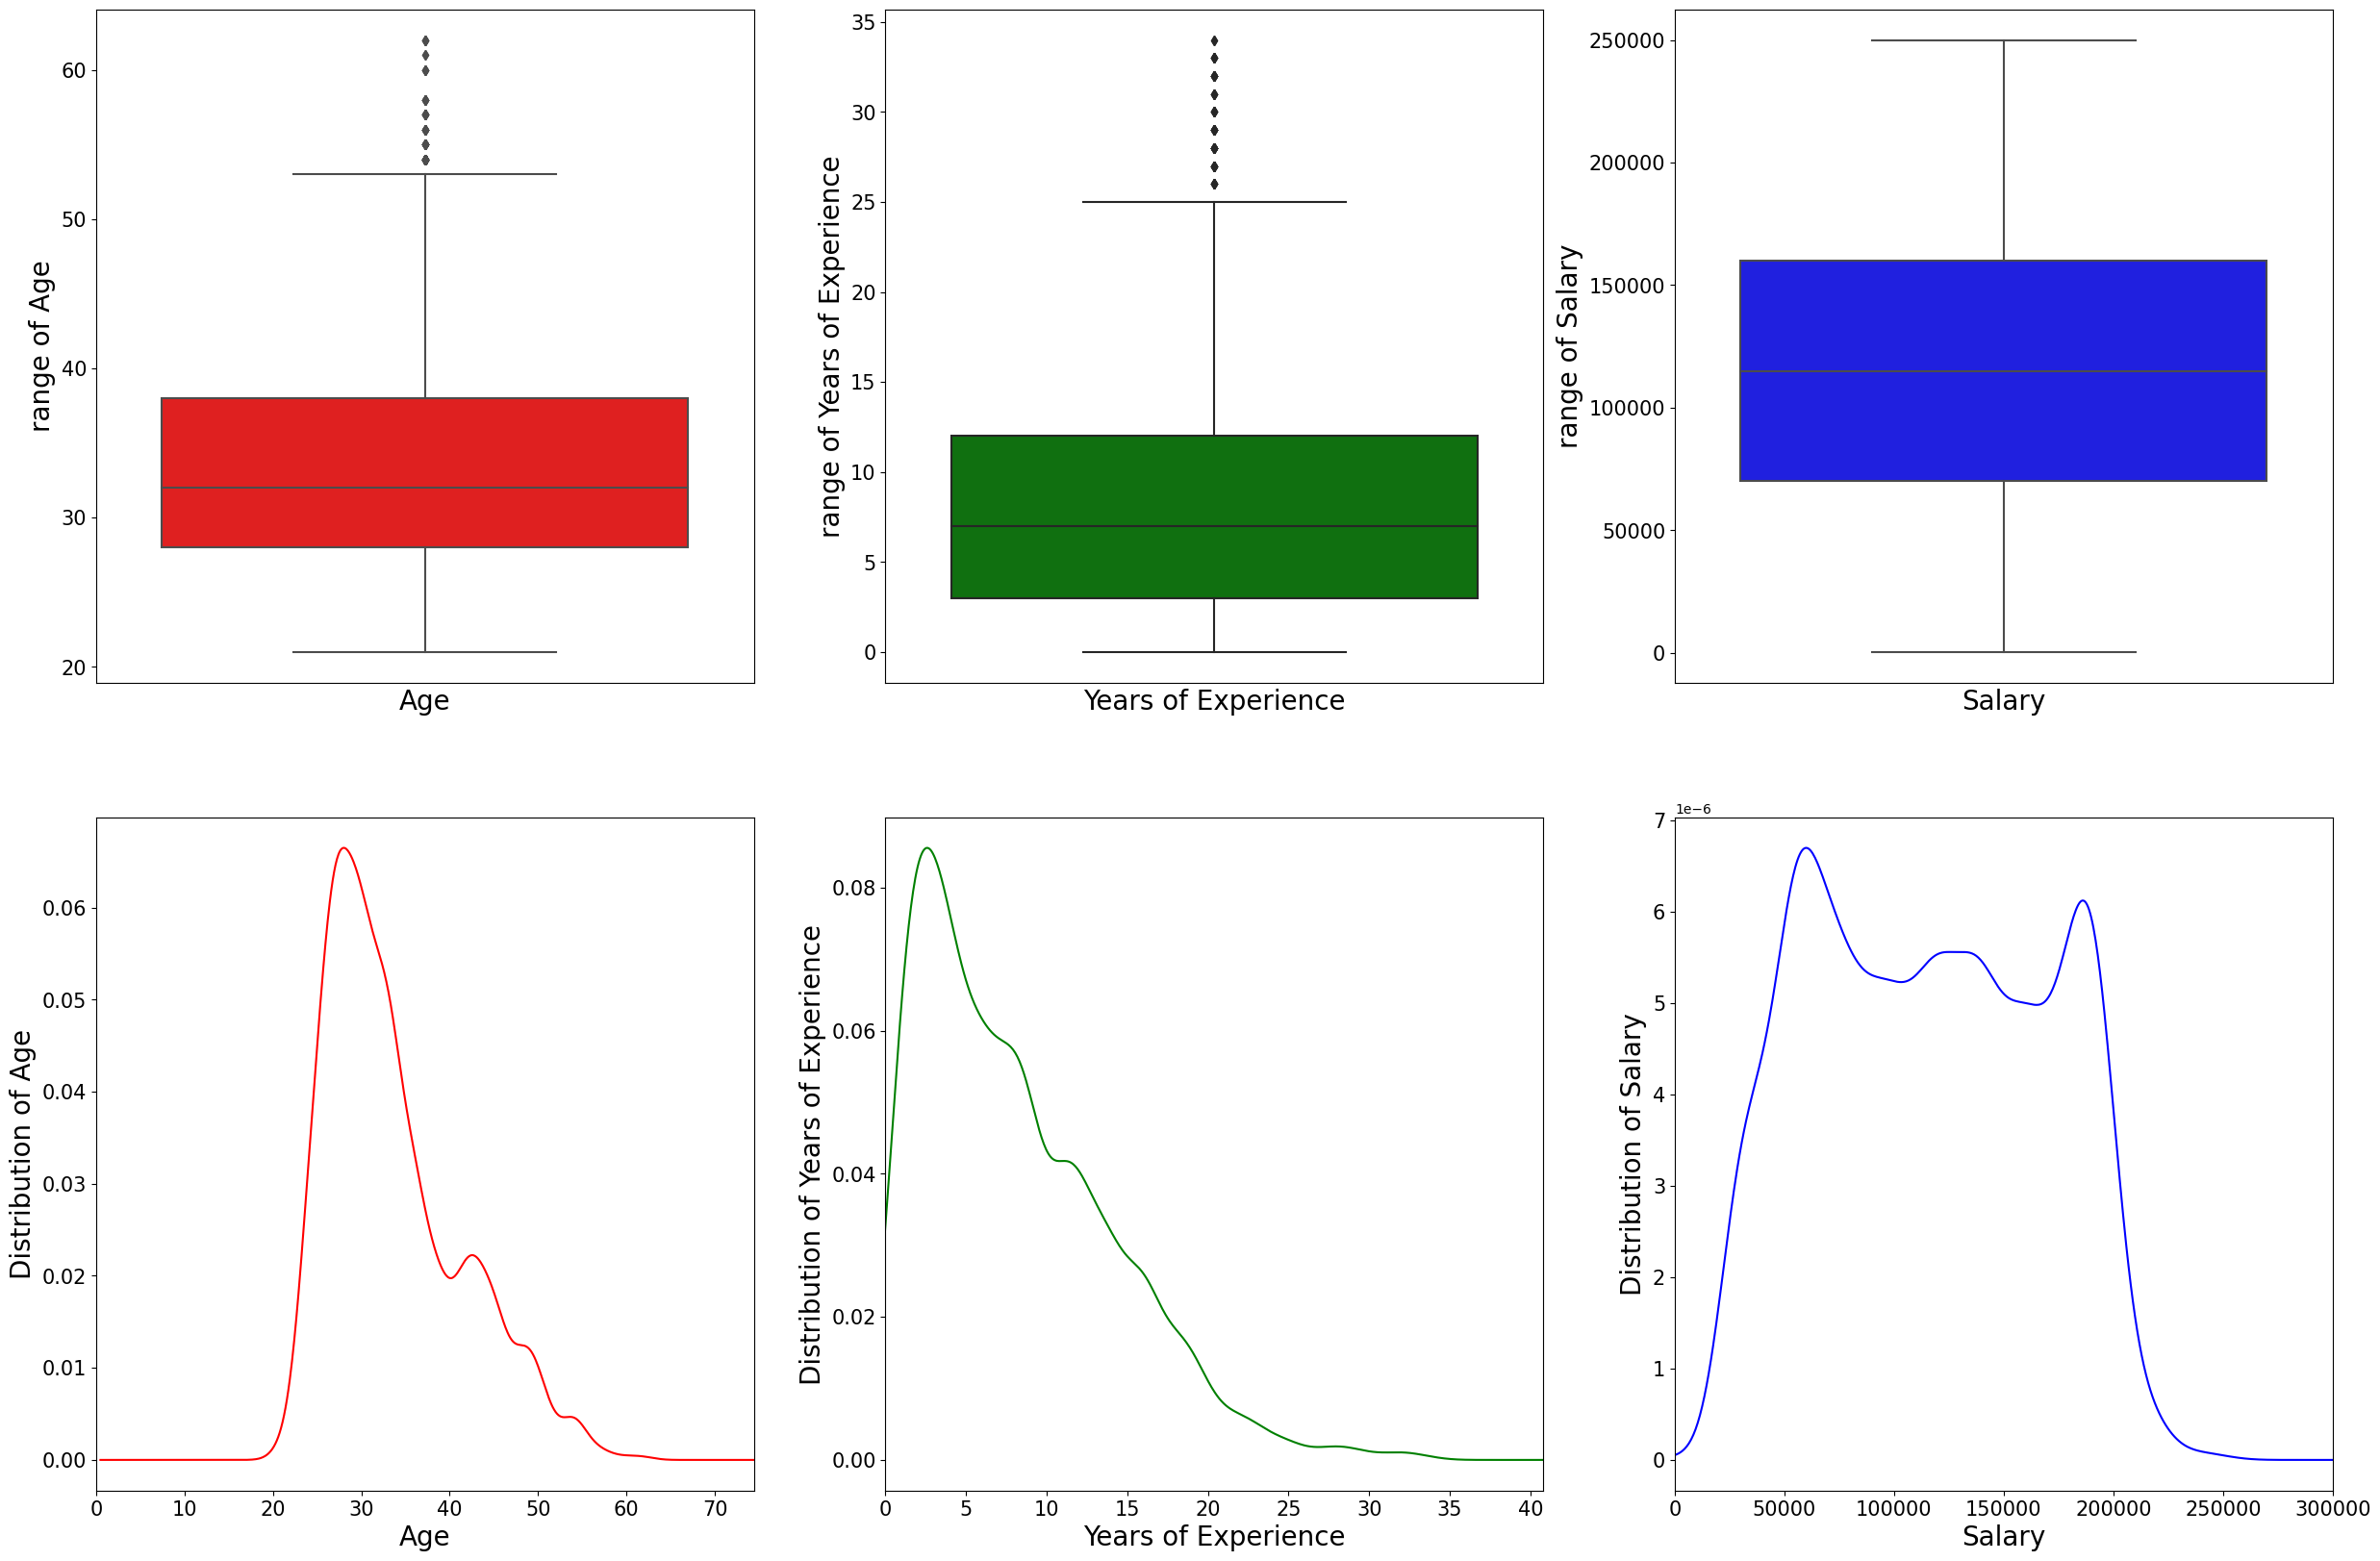

In [7]:
#check numerical vars
fig, axs = plt.subplots(2,3, figsize=(30,20))
NUMERICAL_VARS = ['Age', 'Years of Experience', 'Salary']
NUM_VARS_COLORS = ['red','green', 'blue']
for i, var in enumerate(NUMERICAL_VARS):
  
  #boxplot

  axis = sns.boxplot(salaries_df_preprocessed[var], ax=axs[0][i], color = NUM_VARS_COLORS[i])
  axis.set_xlabel(var, fontsize = 20)
  axis.set_ylabel(f'range of {var}', fontsize = 20)
  axis.tick_params(axis='both', which='major', labelsize=15)
  axis.set_xticks([])
  #Density plot

  axis = salaries_df_preprocessed[var].plot(kind='density', color= NUM_VARS_COLORS[i], ax=axs[1][i])
  axis.set_xlabel(var, fontsize = 20)
  axis.set_ylabel(f'Distribution of {var}', fontsize = 20)
  axis.tick_params(axis='both', which='major', labelsize=15)
  axis.set_xlim([0, np.max(salaries_df_preprocessed[var])*1.2])



A partir da identificação das distribuições como não sendo normais, utilizou-se o método convercional para filtragem de outliers para variáveis com distribuição não-normal.

In [8]:
# Filtering outliers on numerical data bu IRQ
for i, num_var in enumerate(NUMERICAL_VARS):
  outlier_filter_IRQ = DataFilter(filter_by='FILTER_OUTLIERS_BY_IQR', col=num_var)
  salaries_df_preprocessed = outlier_filter_IRQ.process_data(salaries_df_preprocessed)

Performing Data Filtering... 
Data Filtering DONE ! 

Performing Data Filtering... 
Data Filtering DONE ! 

Performing Data Filtering... 
Data Filtering DONE ! 



Checando a filtragem de outliers...

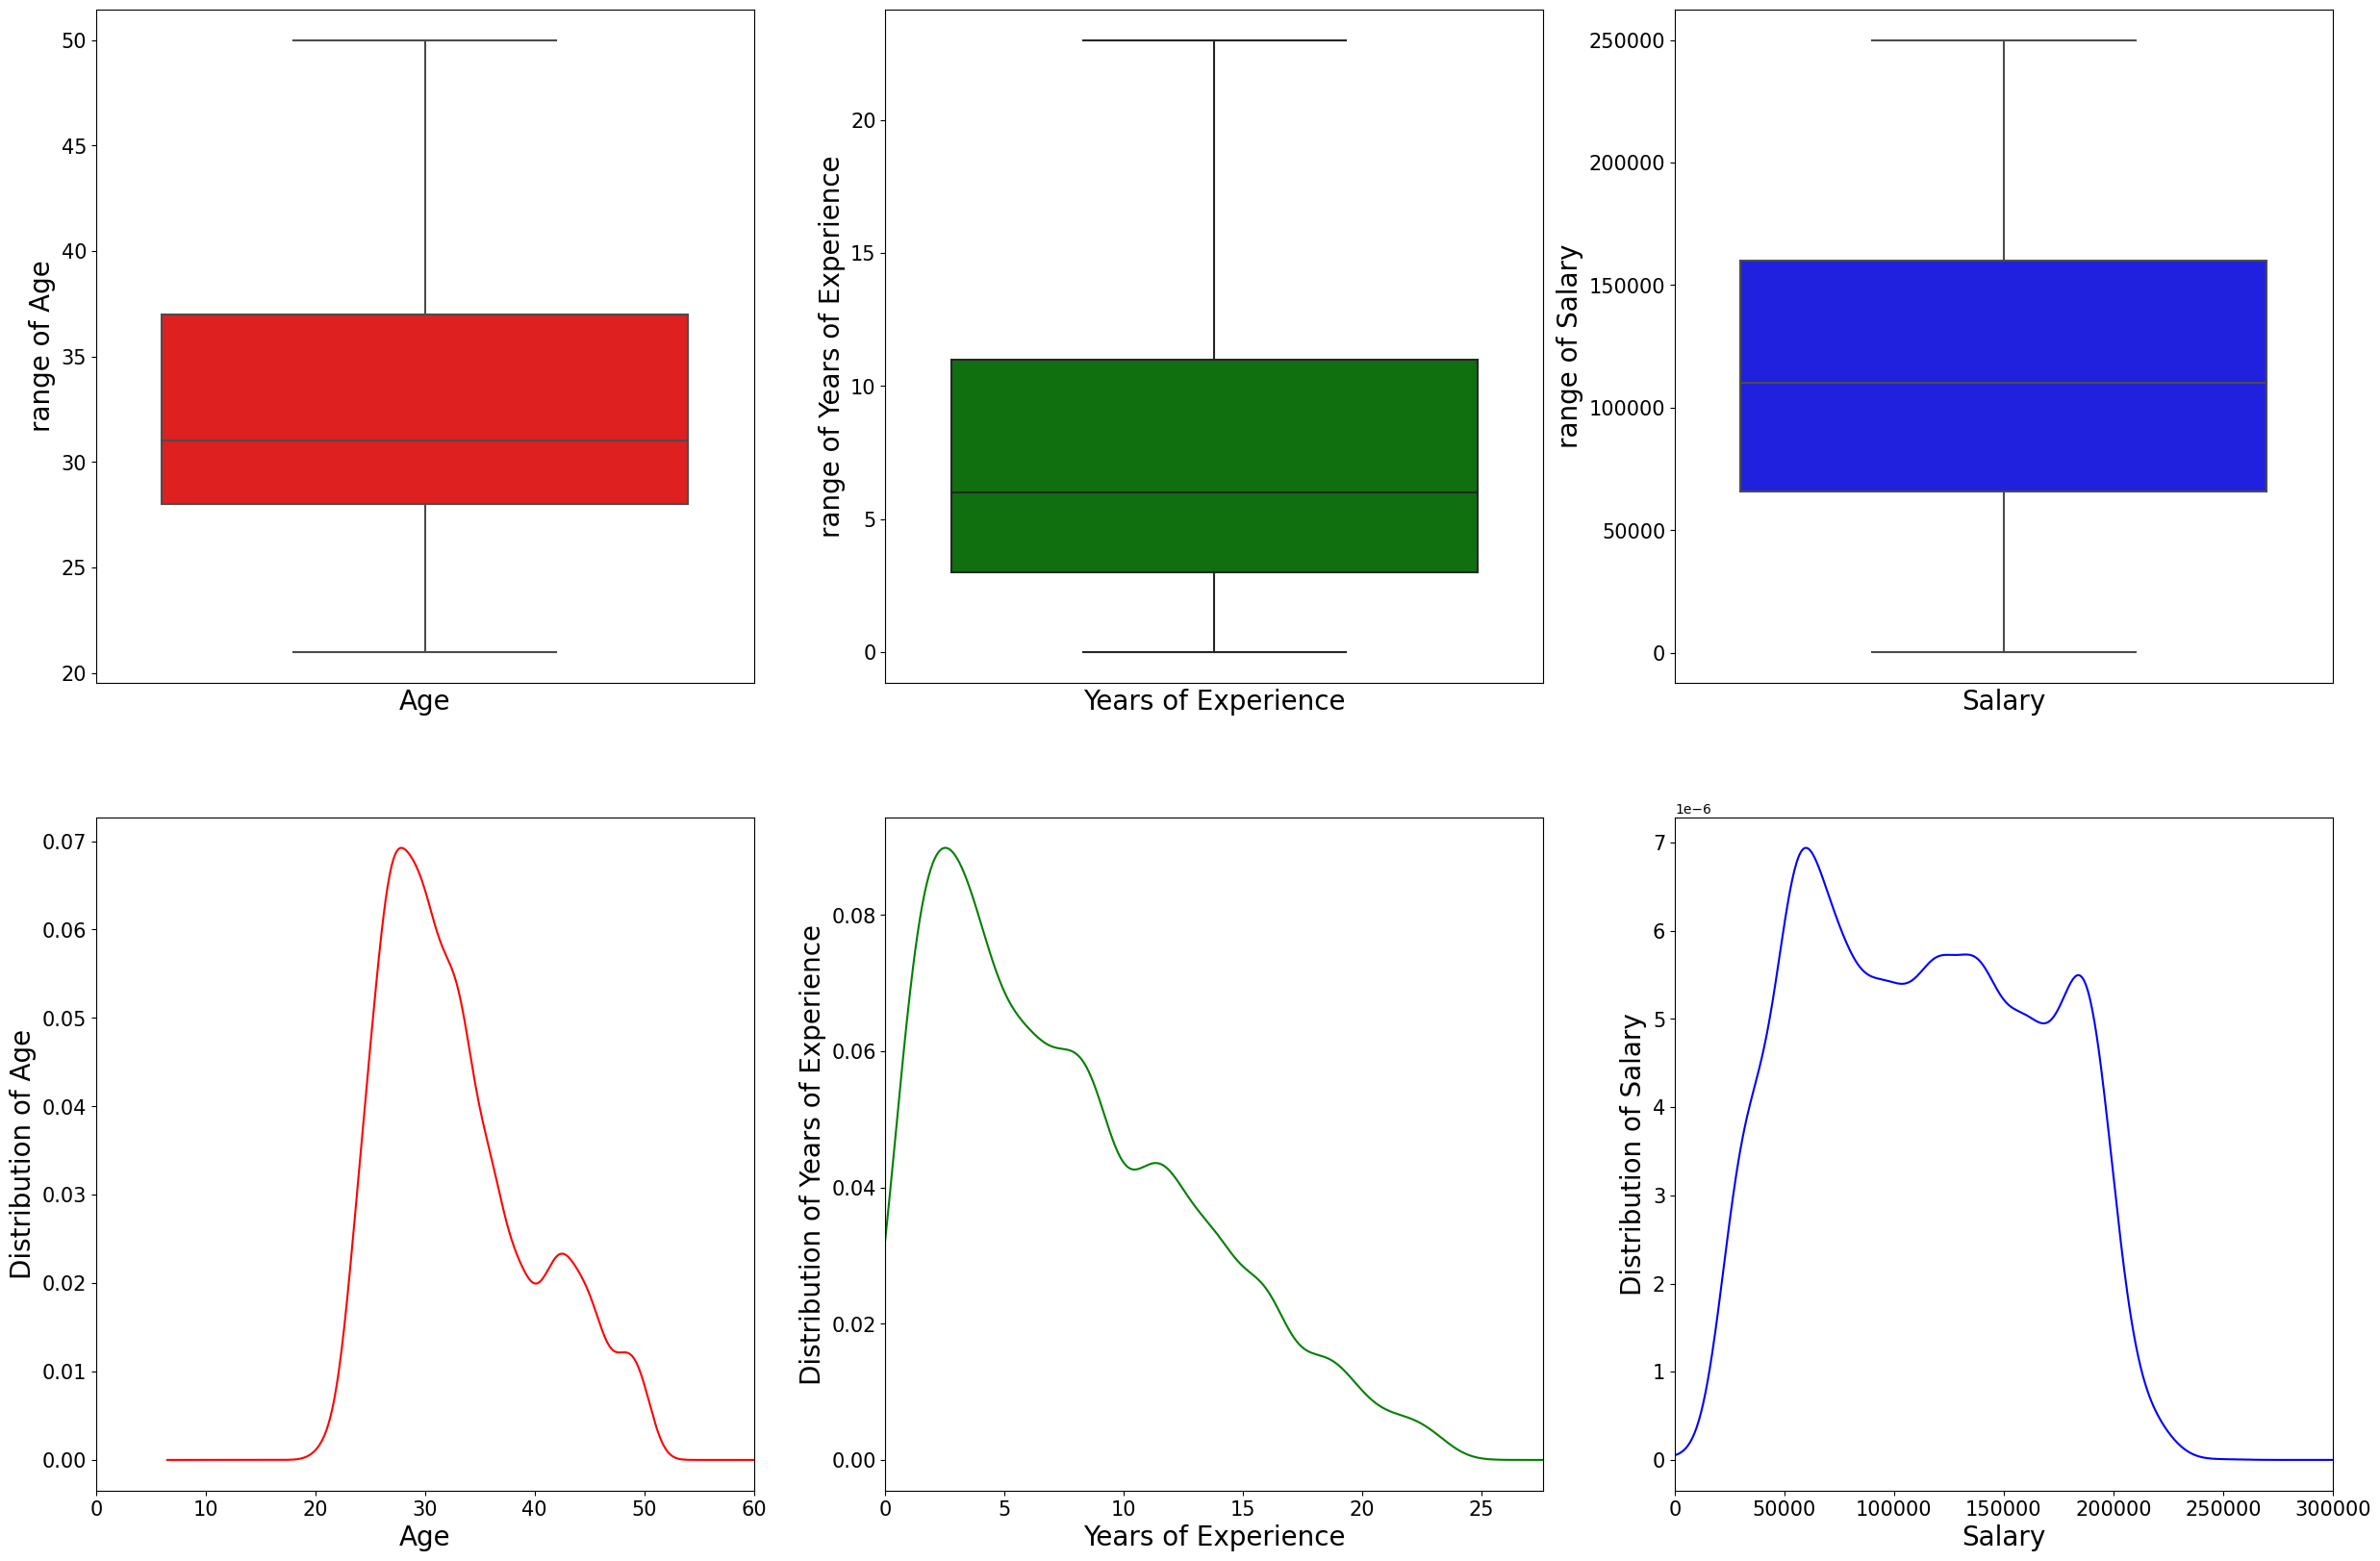

In [9]:
#check numerical vars
fig, axs = plt.subplots(2,3, figsize=(30,20))
NUMERICAL_VARS = ['Age', 'Years of Experience', 'Salary']
NUM_VARS_COLORS = ['red','green', 'blue']
for i, var in enumerate(NUMERICAL_VARS):
  
  #boxplot

  axis = sns.boxplot(salaries_df_preprocessed[var], ax=axs[0][i], color = NUM_VARS_COLORS[i])
  axis.set_xlabel(var, fontsize = 20)
  axis.set_ylabel(f'range of {var}', fontsize = 20)
  axis.tick_params(axis='both', which='major', labelsize=15)
  axis.set_xticks([])
  #Density plot

  axis = salaries_df_preprocessed[var].plot(kind='density', color= NUM_VARS_COLORS[i], ax=axs[1][i])
  axis.set_xlabel(var, fontsize = 20)
  axis.set_ylabel(f'Distribution of {var}', fontsize = 20)
  axis.tick_params(axis='both', which='major', labelsize=15)
  axis.set_xlim([0, np.max(salaries_df_preprocessed[var])*1.2])

Consta-se que os outliers foram assim eliminados

### Variáveis Categoricas 

A seguir faz-se a análise das variáveis categórica e o seu pré-processamento. Nesse tópico focaremos em analisar como está o balanceamento de cada uma cadas classes presentes em cada uma das variáveis categórica e eliminares as classes que não são significativas.

<Axes: >

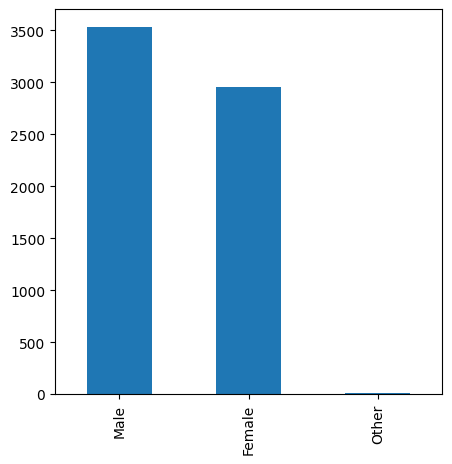

In [10]:
plt.figure(figsize=(5,5))
salaries_df_preprocessed['Gender'].value_counts().plot(kind='bar')

Nesse casa a classe "Other" não é significativa, então ela deve ser eliminada

<Axes: >

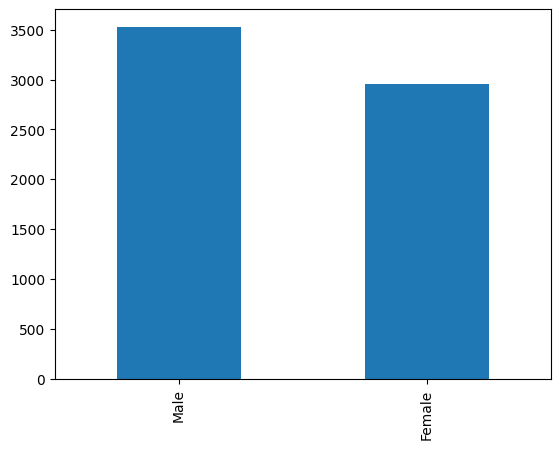

In [11]:
salaries_df_preprocessed = salaries_df_preprocessed[salaries_df_preprocessed['Gender'] != 'Other']
salaries_df_preprocessed['Gender'].value_counts().plot(kind='bar')

<Axes: >

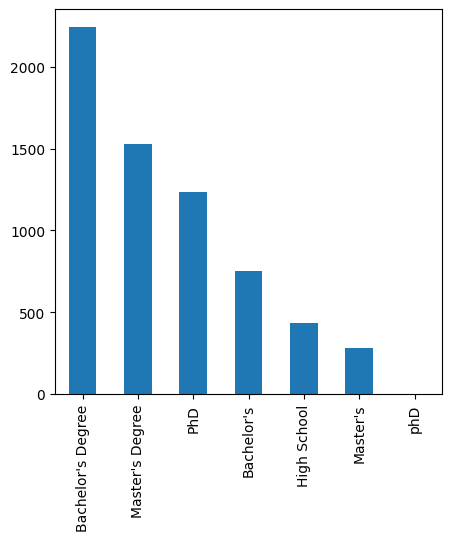

In [12]:
plt.figure(figsize=(5,5))
salaries_df_preprocessed['Education Level'].value_counts().plot(kind='bar')

Nesse caso percebemos que existem classes redundantes, então transformaremos unificaremos as classes que visalmente são a mesma coisa. Não faz sentido por exemplo diferenciar pessoas com grau de escolaridade "PHD" e "phD" na prática é a mesma coisa. Trateremos de casos como esse abaixo:


<Axes: >

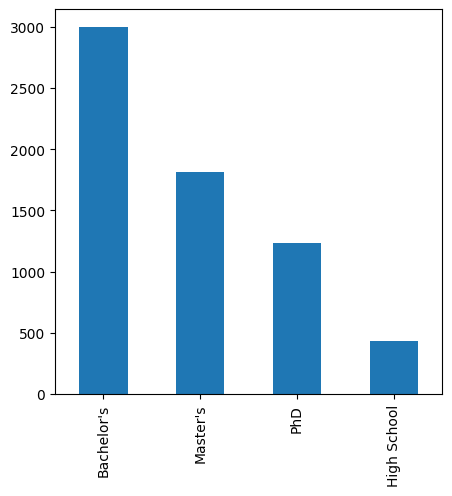

In [13]:
salaries_df_preprocessed['Education Level'] = salaries_df_preprocessed['Education Level'].replace('Bachelor\'s Degree','Bachelor\'s')
salaries_df_preprocessed['Education Level'] = salaries_df_preprocessed['Education Level'].replace('Master\'s Degree','Master\'s')
salaries_df_preprocessed['Education Level'] = salaries_df_preprocessed['Education Level'].replace('phD','PhD')

plt.figure(figsize=(5,5))
salaries_df_preprocessed['Education Level'].value_counts().plot(kind='bar')

 A seguir uma análise de balanceamento dos cargos de trabalho:

<Axes: >

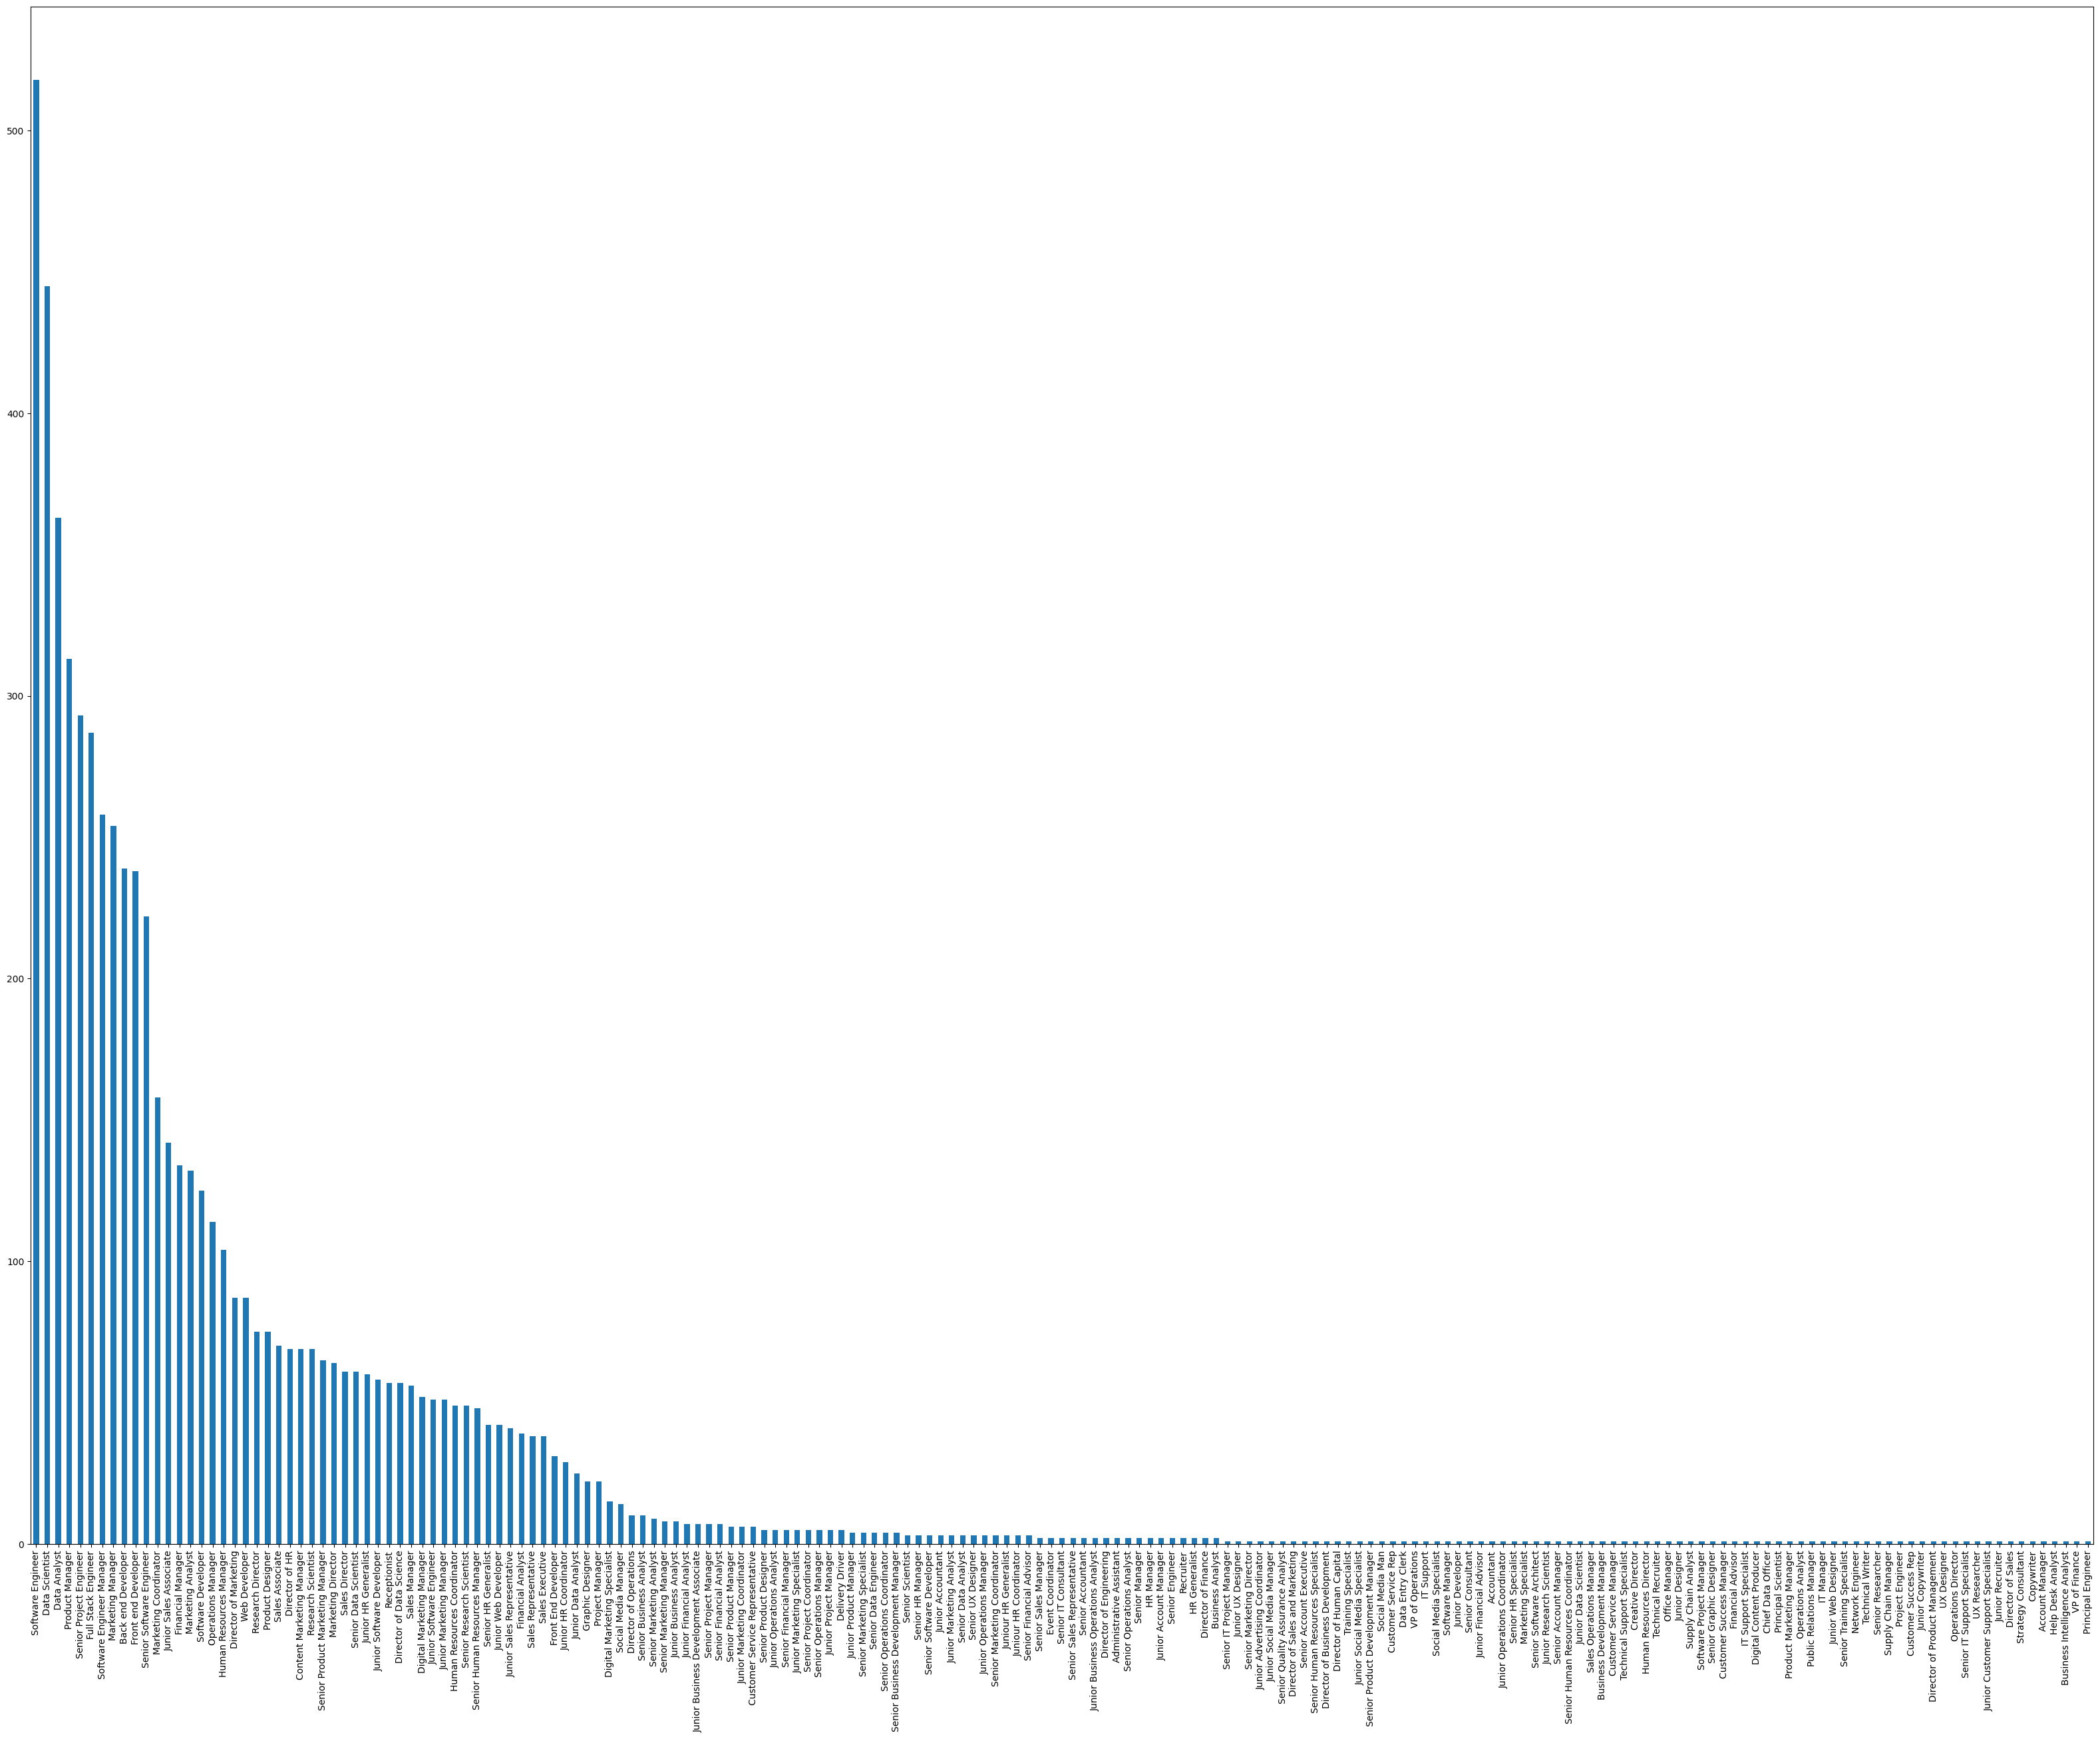

In [14]:
plt.figure(figsize=(40,30))
salaries_df_preprocessed['Job Title'].value_counts().plot(kind='bar')

In [15]:
sum(salaries_df_preprocessed['Job Title'].value_counts()[salaries_df_preprocessed['Job Title'].value_counts() < 30].values)

427

In [16]:
sum(salaries_df_preprocessed['Job Title'].value_counts()[salaries_df_preprocessed['Job Title'].value_counts() < 30].values)/len(salaries_df_preprocessed)*100

6.592558283155782

Percebe-se que no dataset profissões com menos de 30 exemplos contitui-se somente 6.5% do dataset e como visto acim são a maoria das classes. Sendo assim eliminaremos as classes cuja a frequência seja menos de 30:

Performing Data Filtering... 
Data Filtering DONE ! 



<Axes: >

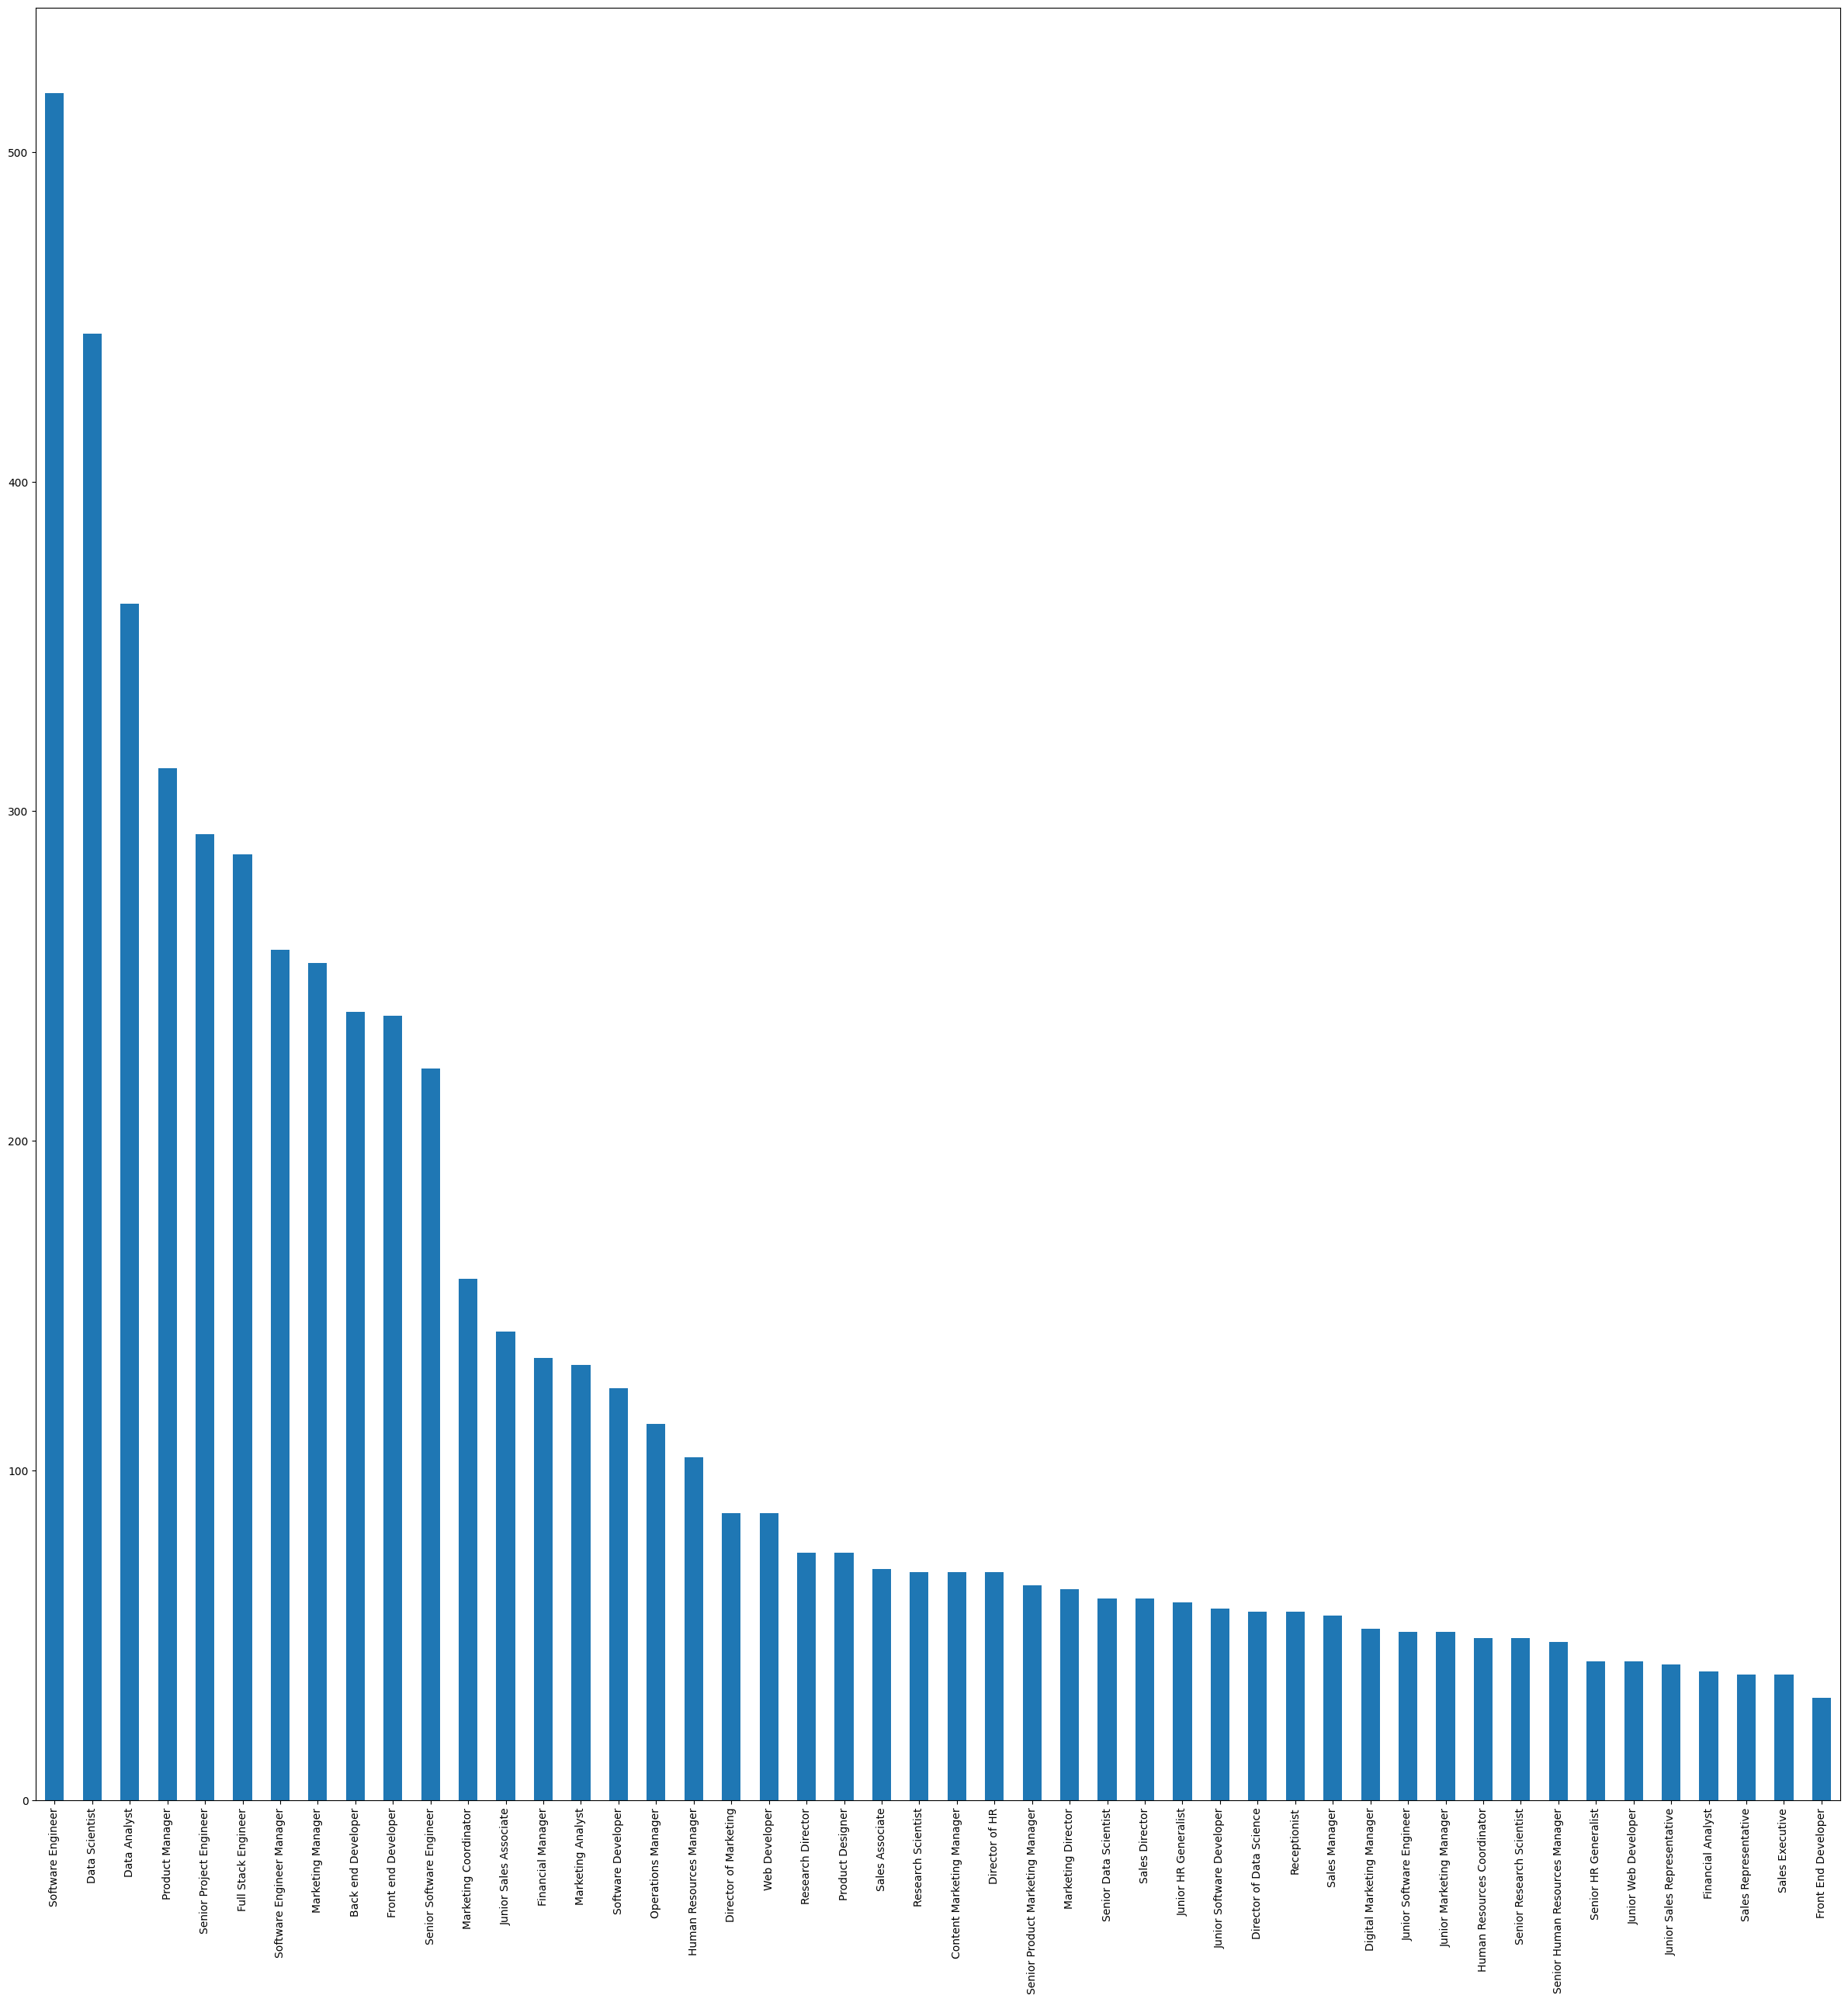

In [17]:
plt.figure(figsize=(30,30))
filtering_less_freq_job_title = DataFilter(filter_by='FREQ_LOWER_THAN_VALUE', by_value =  30, col='Job Title')
filtering_less_freq_job_title.process_data(salaries_df_preprocessed)['Job Title'].value_counts().plot(kind='bar')

In [18]:
salaries_df_preprocessed = filtering_less_freq_job_title.process_data(salaries_df_preprocessed)

Performing Data Filtering... 
Data Filtering DONE ! 



In [19]:
salaries_df_preprocessed['Job Title'].value_counts()

Software Engineer                   518
Data Scientist                      445
Data Analyst                        363
Product Manager                     313
Senior Project Engineer             293
Full Stack Engineer                 287
Software Engineer Manager           258
Marketing Manager                   254
Back end Developer                  239
Front end Developer                 238
Senior Software Engineer            222
Marketing Coordinator               158
Junior Sales Associate              142
Financial Manager                   134
Marketing Analyst                   132
Software Developer                  125
Operations Manager                  114
Human Resources Manager             104
Director of Marketing                87
Web Developer                        87
Research Director                    75
Product Designer                     75
Sales Associate                      70
Research Scientist                   69
Content Marketing Manager            69


## Analise de correlação das Features

---



Como última análise, analisaremos a correlação entre as variáveis de entrada com a finalidade de identificar variáveis que sejam reduntantes entre si:

Text(1058.1767676767674, 0.5, 'Yeas of Expirience')

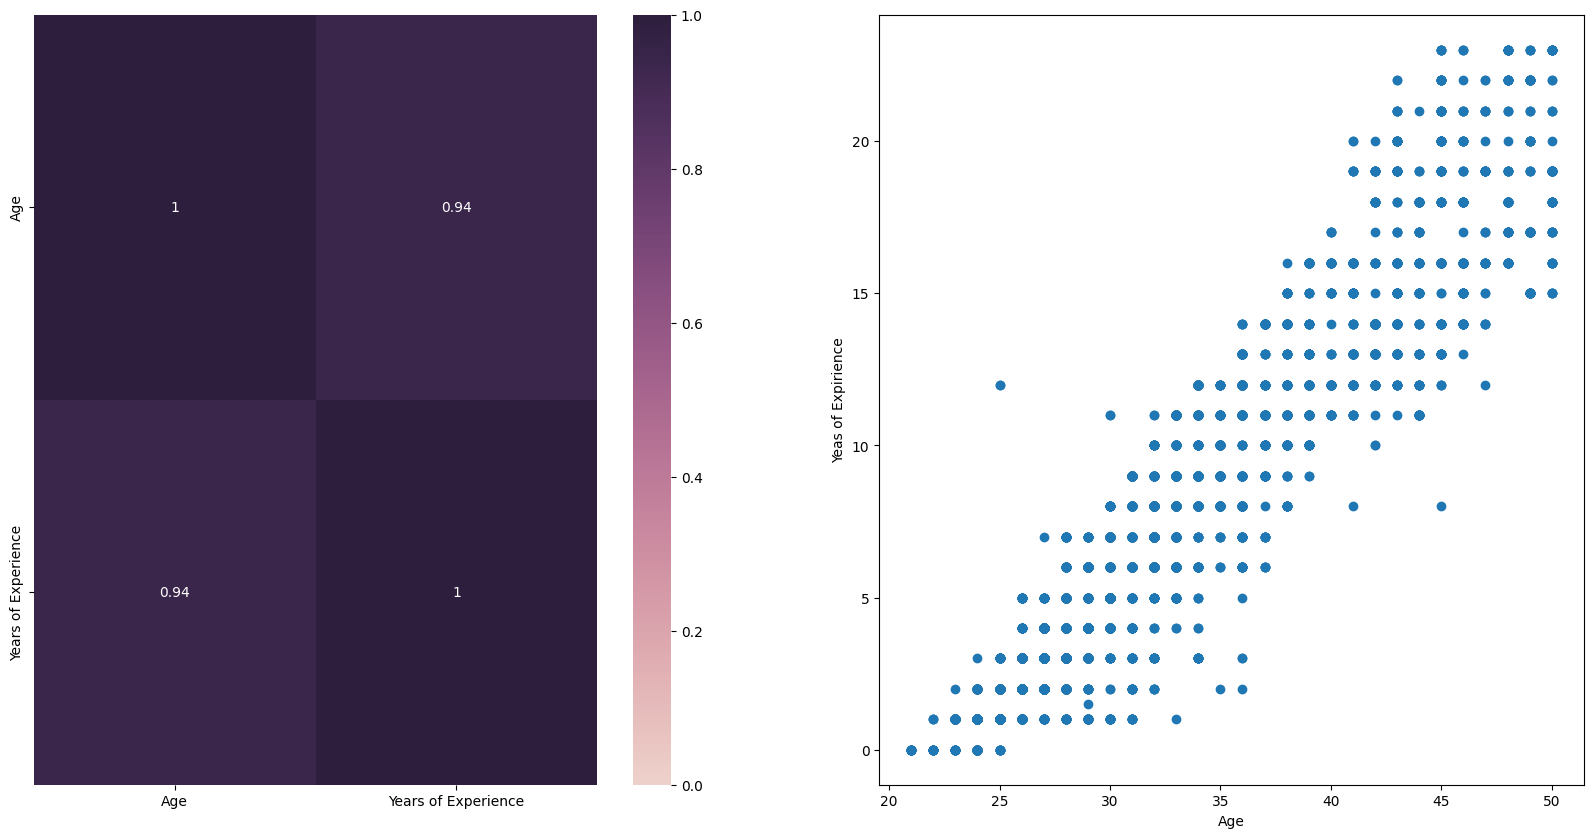

In [20]:
fig, axs = plt.subplots(1,2, figsize=(20,10))


# Plot heatmap

features = salaries_df_preprocessed.drop(['Salary'], axis =1)
palette = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(features.corr(), annot=True, cmap=palette, vmin=0, vmax=1,ax=axs[0])


#plot Scatterplot
ages = salaries_df_preprocessed['Age'].values
years_of_expirience = salaries_df_preprocessed['Years of Experience'].values
axs[1].scatter( ages ,years_of_expirience)
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Yeas of Expirience')



Percebe-se que as variáveis "Age" e "Years of Expirience" são redundantes. De certo modo faz setido já que logicamente pessoas mais velhas tem mais anos de experência. Logo não há sentido usar as duas no modelo. Com isso é necessário eliminar uma delas. Ficaremos então com a variável ***Yeas of Expirience e eliminaremo*** a variável ***Age***, já que faz todo sentido que quanto mais velha uma pessoa for, mas anos de experiência ela terá.

In [21]:
salaries_df_preprocessed.drop(['Age'], axis = 1, inplace=True)

### Transformação das variáveis numéricas em categóricas

Como modelos de Machine Learning não são capazes de ler dados em String, então temos que transformas os dados categóricos em algum código numérico. O código numérico a ser utilizado vai depender de qual variável se estará lidando, uma variável categórica nomial ou uma ordinal.

In [22]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

A seguir utilizamos o LabelEnconder que codificará a variável "Gender" em 0 e 1's. E a classes OrdinalEncoder para codificar a variável relacionada ao nível de educação, já que níveis de educação possuem uma ordem hierárquica pré-estabelecida entre si.

In [23]:
#instantiate encorders

label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()

# Gender tranformation

salaries_df_preprocessed['Gender'] = label_encoder.fit_transform(salaries_df_preprocessed['Gender'])

#Educational Level Transformation

salaries_df_preprocessed['Education Level'] = ordinal_encoder.fit_transform(salaries_df_preprocessed[['Education Level']])


# Job Title Transformation



A seguir obtemos as  variáveis dummies para codificar a variaveis `Job Title`

In [24]:
# Transform Job title on its dummie code

job_categories = list(pd.get_dummies(salaries_df_preprocessed['Job Title']).columns)
salaries_df_preprocessed[job_categories] = pd.get_dummies(salaries_df_preprocessed['Job Title'])
salaries_df_preprocessed.drop(['Job Title'], axis=1, inplace=True)

In [25]:
salaries_df_preprocessed.head(20)

,Gender,Education Level,Years of Experience,Salary,Back end Developer,Content Marketing Manager,Data Analyst,Data Scientist,Digital Marketing Manager,Director of Data Science,...,Senior HR Generalist,Senior Human Resources Manager,Senior Product Marketing Manager,Senior Project Engineer,Senior Research Scientist,Senior Software Engineer,Software Developer,Software Engineer,Software Engineer Manager,Web Developer
0,1,0.0,5.0,90000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,2.0,3.0,65000.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,7.0,60000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0.0,2.0,55000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,2.0,12.0,120000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0.0,4.0,80000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0.0,1.0,45000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1,2.0,3.0,75000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12,1,0.0,6.0,65000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1,0.0,16.0,125000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#Salvando o Dataset...

salaries_df_preprocessed.to_csv(DATASET_PATH + "Salary_Data_preprocessed.csv")

## Modelagem

Tendo os dados no dataset pré-processados, agora passamos a etapa de modelagem. Nessa etapa realizaremos a validação de modelos escolhidos para resolver o problema de regressão que estamos lidando. A ideia é colocar esses modelos para "competirem" entre sí em várias situações diferentes  através do desempenho no cross-over e pré-liminarmente selecionar os 4 melhores para a próxima etapa.

Para se avaliar a performance dos modelos é necessário a escolha de uma métrica.Para este projeto escolhemos a métrica RMSE devido a ser mais fácil de interpretar nos resultados e por isso ser mais explicativa, já que possui a mesma unidade de medida que os resultados.

A realização do cross_over em três diferêntes cenários: 

* Sem tratamente nos dados
* Usando normalização de dados
* Usando a padronização de dados


Vale observar que criou-se uma classe especialmente para  realizar o cross validation e em seguida emitir relatório dos resultados. A classe criada nomea-se de `RegressionModelsEvaluator`, e serve para avaliações e confeção de relatórios para modelo de regressão. Apresentando a média da métrica escolhida como a varância em termo dessa métrica, que vai dizer o grau de inceteza em torno da métrica escolhidaa para avaliar o modelo.



###Sem tratamente nos dados

In [27]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split


# Data preparation for modeling

X  = salaries_df_preprocessed.drop('Salary',axis = 1).values
y = salaries_df_preprocessed['Salary'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 7)

# Create fold to perform validation

partitions = 7
kfold = KFold(n_splits = partitions, shuffle = True, random_state = 7 )

In [28]:
import random

def generate_random_hex_colors(length):
    hex_colors = []
    for _ in range(length):
        hex_color = '#{:06x}'.format(random.randint(0, 0xFFFFFF))
        hex_colors.append(hex_color)
    return hex_colors


In [29]:
from ModelEvaluation.RegressionModelsEvaluator import RegressionModelsEvaluator
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, VotingRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor


models = []

# Preparing the models to the competition

models.append( ('LR  ', LinearRegression() ) )
models.append( ('CART', DecisionTreeRegressor() ) )
models.append( ('KNN ', KNeighborsRegressor() ))
models.append( ('SVM ', SVR() ))
models.append( ('RF  ', RandomForestRegressor() ))
models.append( ('ADA ', AdaBoostRegressor() ))
models.append( ('VOT ', VotingRegressor( [( 'LRV', LinearRegression() ), ('RFV', RandomForestRegressor() ), ('KNNV', KNeighborsRegressor() ) ]) ))
models.append( ('BAG ', BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100) ))
models.append( ('ETR ', ExtraTreesRegressor() ))
models.append( ('GBR ', GradientBoostingRegressor() ))

#set model evaluator
palette = generate_random_hex_colors(len(models))
models_evaluator = RegressionModelsEvaluator(partitions_on_data=7, test_size=0.20, color_palette=palette)

### Avaliação Sem faze rescaling dos dados

In [30]:
names, results, report_df = models_evaluator.evaluate_models(models, salaries_df_preprocessed, 'Salary')

LR  			   MSE 437539527.16	 | STD:	 714.27	 | RMSE: 	 20905.25	 |
CART			   MSE 129201183.23	 | STD:	 751.73	 | RMSE: 	 11341.78	 |
KNN 			   MSE 168957077.71	 | STD:	 999.67	 | RMSE: 	 12959.85	 |
SVM 			   MSE 2625695410.52	 | STD:	 967.89	 | RMSE: 	 51232.40	 |
RF  			   MSE 117240399.12	 | STD:	 562.51	 | RMSE: 	 10813.14	 |
ADA 			   MSE 585575711.11	 | STD:	 627.96	 | RMSE: 	 24190.52	 |
VOT 			   MSE 154494073.61	 | STD:	 631.08	 | RMSE: 	 12413.53	 |
BAG 			   MSE 117367260.10	 | STD:	 593.97	 | RMSE: 	 10817.32	 |
ETR 			   MSE 116917502.25	 | STD:	 687.84	 | RMSE: 	 10790.94	 |
GBR 			   MSE 266960003.44	 | STD:	 992.15	 | RMSE: 	 16308.76	 |


In [31]:
report_df

,MSE,STD,RMSE,color
NAME,,,,
ETR,1.169175e+08,687.842719,10790.939470,#f48fc9
RF,1.172404e+08,562.511319,10813.139236,#300642
BAG,1.173673e+08,593.967164,10817.322363,#7102d2
CART,1.292012e+08,751.731423,11341.784829,#aa4c5e
VOT,1.544941e+08,631.084447,12413.533181,#ba3695
KNN,1.689571e+08,999.674306,12959.850655,#d727ca
GBR,2.669600e+08,992.145068,16308.759965,#2bf81b
LR,4.375395e+08,714.272763,20905.246748,#5383ad
ADA,5.855757e+08,627.959852,24190.522473,#ec0fa0


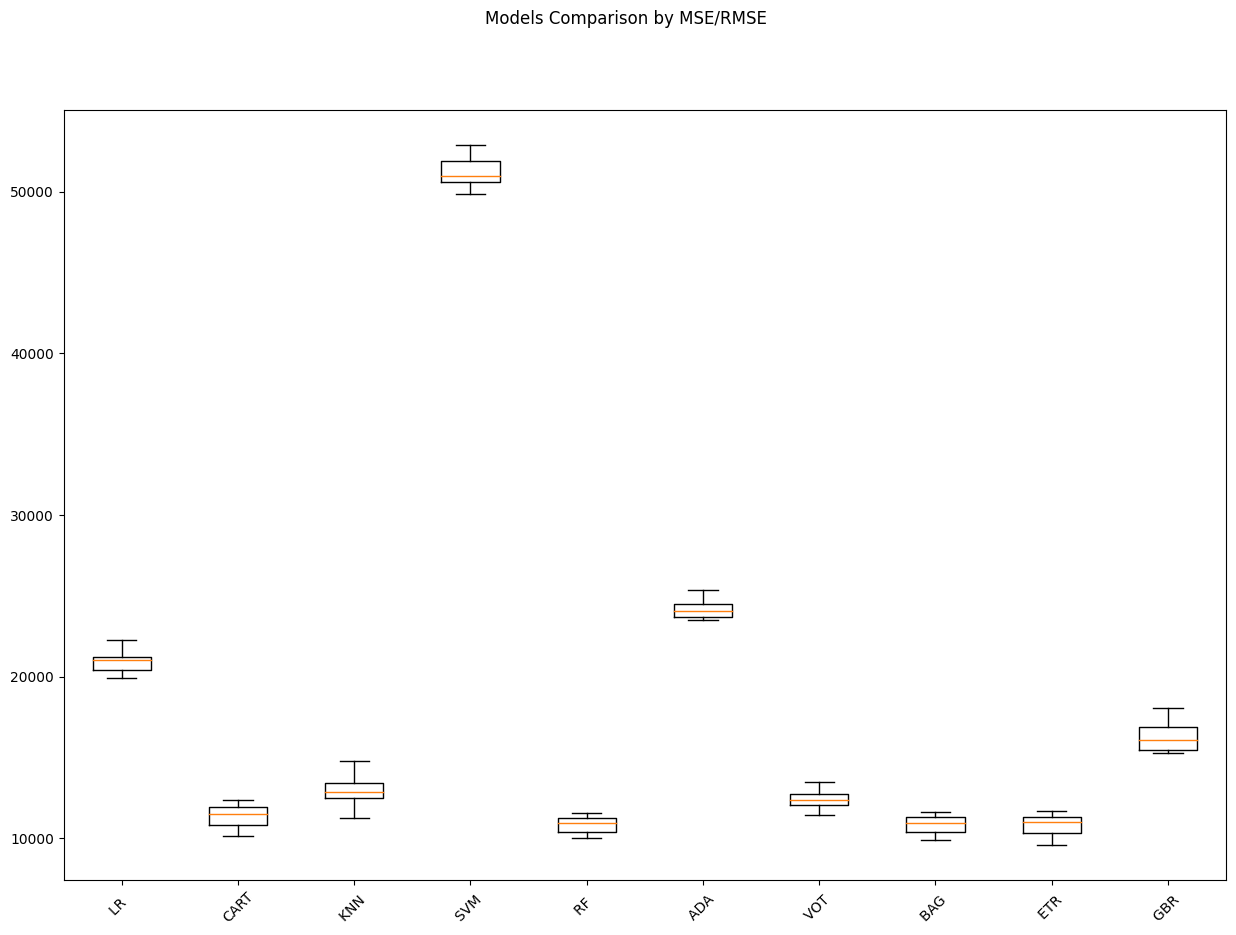

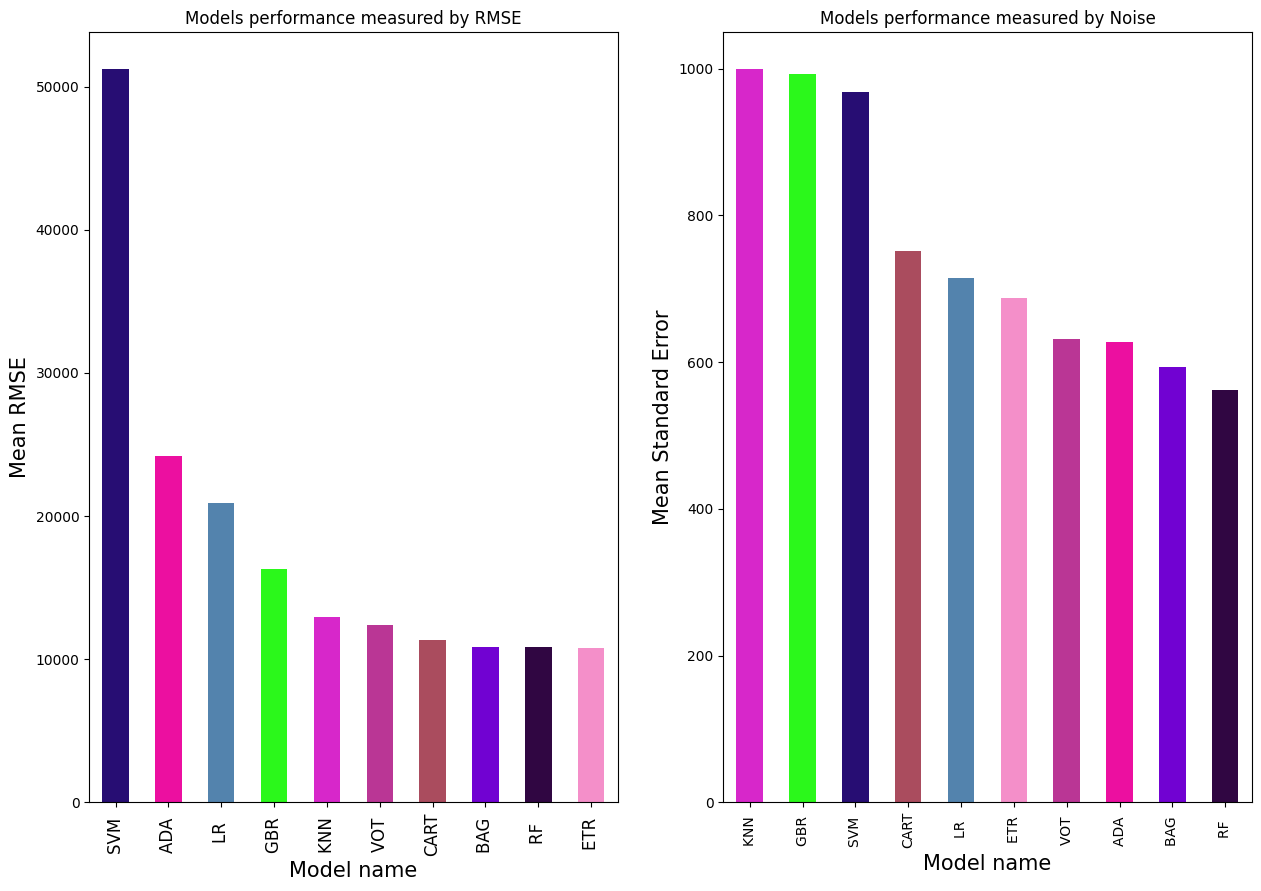

In [32]:
models_evaluator.generate_performance_report(names, results, report_df)

#### Usando MinMax

In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

minMaxScaler = ('MinMaxScaler', MinMaxScaler())
stdScaler = ('StandardScaler', StandardScaler() )

In [34]:
minMax_pipelines = [(model_name + ' - minMaxScaled', Pipeline( [minMaxScaler, (model_name, model) ] )) for model_name, model in models]


In [35]:
names, results, report_df_minmax = models_evaluator.evaluate_models(minMax_pipelines, salaries_df_preprocessed, 'Salary')

LR   - minMaxScaled			   MSE 437533249.17	 | STD:	 714.59	 | RMSE: 	 20905.09	 |
CART - minMaxScaled			   MSE 129201183.23	 | STD:	 751.73	 | RMSE: 	 11341.78	 |
KNN  - minMaxScaled			   MSE 188015702.65	 | STD:	 1031.37	 | RMSE: 	 13673.04	 |
SVM  - minMaxScaled			   MSE 2676414681.54	 | STD:	 971.70	 | RMSE: 	 51724.95	 |
RF   - minMaxScaled			   MSE 117276836.91	 | STD:	 560.11	 | RMSE: 	 10814.95	 |
ADA  - minMaxScaled			   MSE 584989307.91	 | STD:	 616.64	 | RMSE: 	 24178.69	 |
VOT  - minMaxScaled			   MSE 155112084.72	 | STD:	 601.60	 | RMSE: 	 12439.86	 |
BAG  - minMaxScaled			   MSE 117375392.10	 | STD:	 592.38	 | RMSE: 	 10817.79	 |
ETR  - minMaxScaled			   MSE 116917502.25	 | STD:	 687.84	 | RMSE: 	 10790.94	 |
GBR  - minMaxScaled			   MSE 267152586.42	 | STD:	 984.15	 | RMSE: 	 16315.15	 |


In [36]:
report_df.iloc[:,:-1]

,MSE,STD,RMSE
NAME,,,
ETR,1.169175e+08,687.842719,10790.939470
RF,1.172404e+08,562.511319,10813.139236
BAG,1.173673e+08,593.967164,10817.322363
CART,1.292012e+08,751.731423,11341.784829
VOT,1.544941e+08,631.084447,12413.533181
KNN,1.689571e+08,999.674306,12959.850655
GBR,2.669600e+08,992.145068,16308.759965
LR,4.375395e+08,714.272763,20905.246748
ADA,5.855757e+08,627.959852,24190.522473


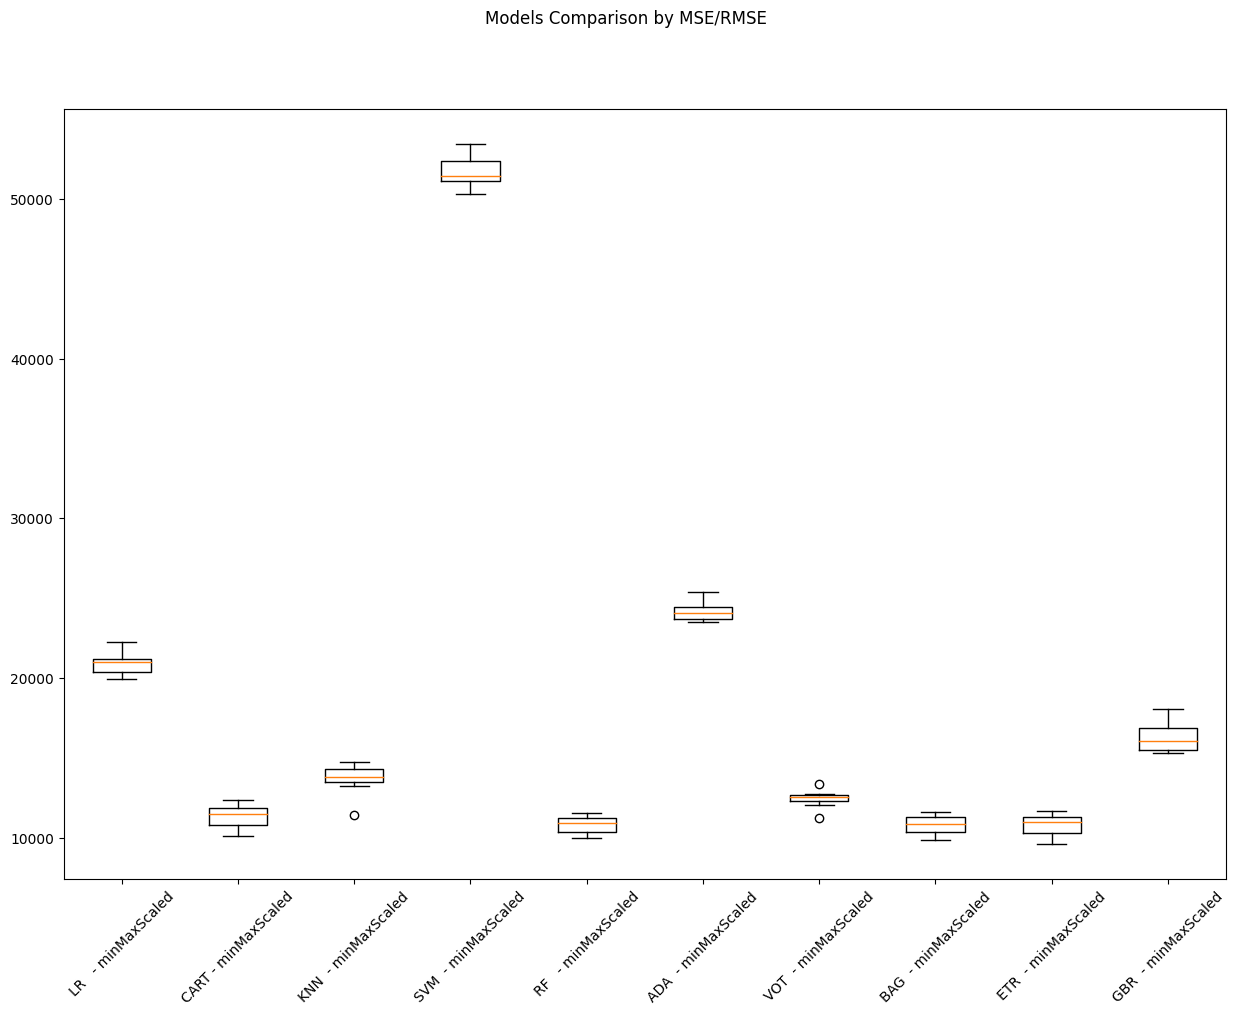

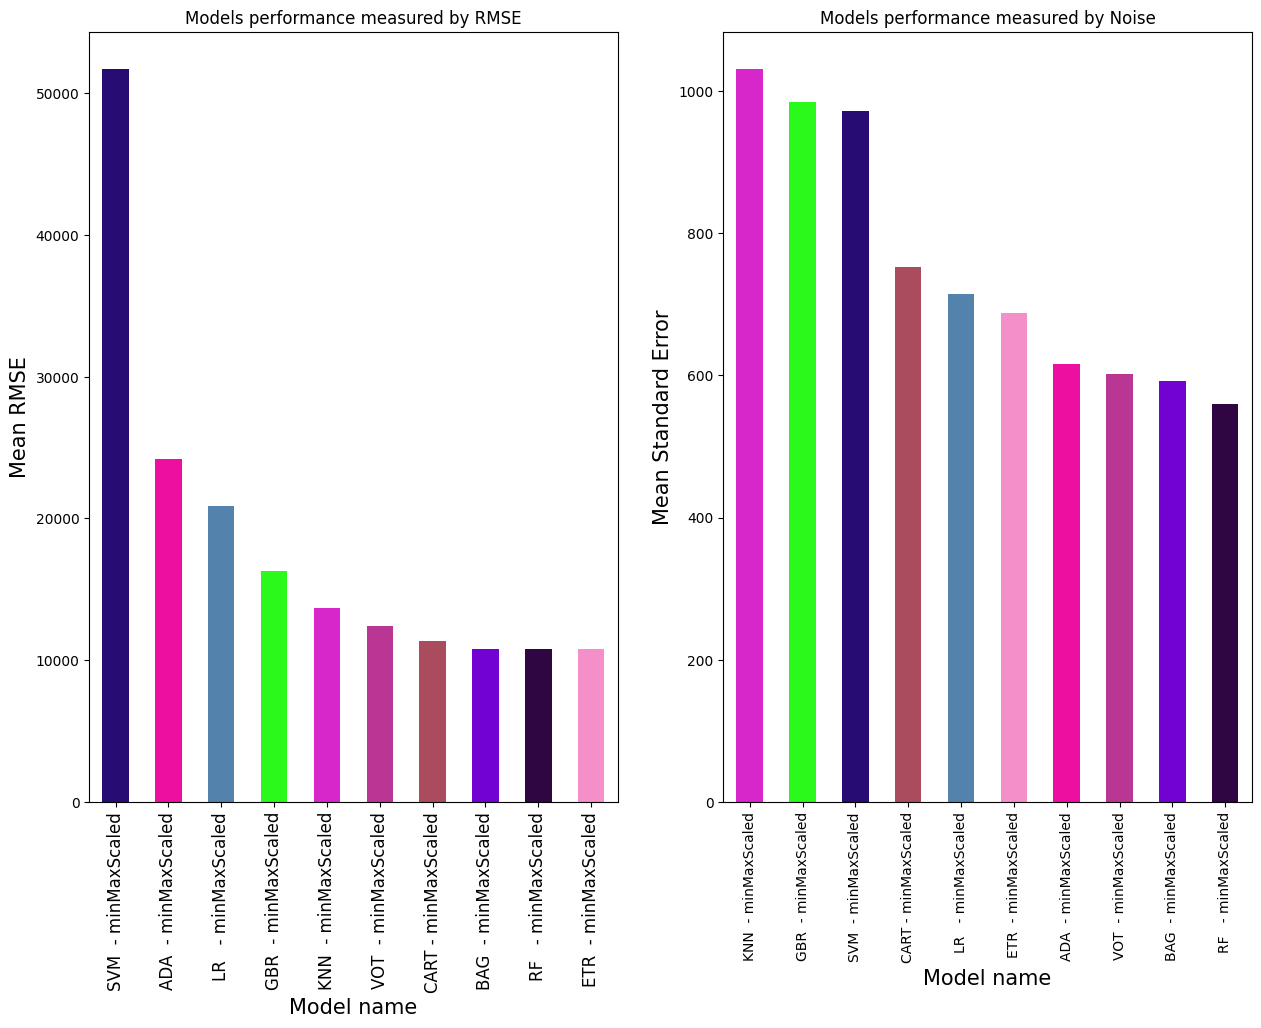

In [37]:
models_evaluator.generate_performance_report(names, results, report_df_minmax)

#Usando a Padronização

In [38]:
std_pipelines = [(model_name + '- stdScaler', Pipeline( [stdScaler, (model_name, model) ] )) for model_name, model in models]


In [39]:
names, results, report_df_std = models_evaluator.evaluate_models(std_pipelines, salaries_df_preprocessed, 'Salary')

LR  - stdScaler			   MSE 438311825.61	 | STD:	 726.21	 | RMSE: 	 20923.30	 |
CART- stdScaler			   MSE 129327305.42	 | STD:	 750.82	 | RMSE: 	 11347.40	 |
KNN - stdScaler			   MSE 174845186.52	 | STD:	 968.14	 | RMSE: 	 13187.41	 |
SVM - stdScaler			   MSE 2678501940.84	 | STD:	 971.15	 | RMSE: 	 51745.13	 |
RF  - stdScaler			   MSE 117663385.54	 | STD:	 578.67	 | RMSE: 	 10831.83	 |
ADA - stdScaler			   MSE 599872641.11	 | STD:	 580.99	 | RMSE: 	 24485.41	 |
VOT - stdScaler			   MSE 153614443.91	 | STD:	 612.43	 | RMSE: 	 12378.99	 |
BAG - stdScaler			   MSE 116962471.45	 | STD:	 609.58	 | RMSE: 	 10797.73	 |
ETR - stdScaler			   MSE 117447254.17	 | STD:	 676.31	 | RMSE: 	 10816.19	 |
GBR - stdScaler			   MSE 266978450.21	 | STD:	 991.08	 | RMSE: 	 16309.39	 |


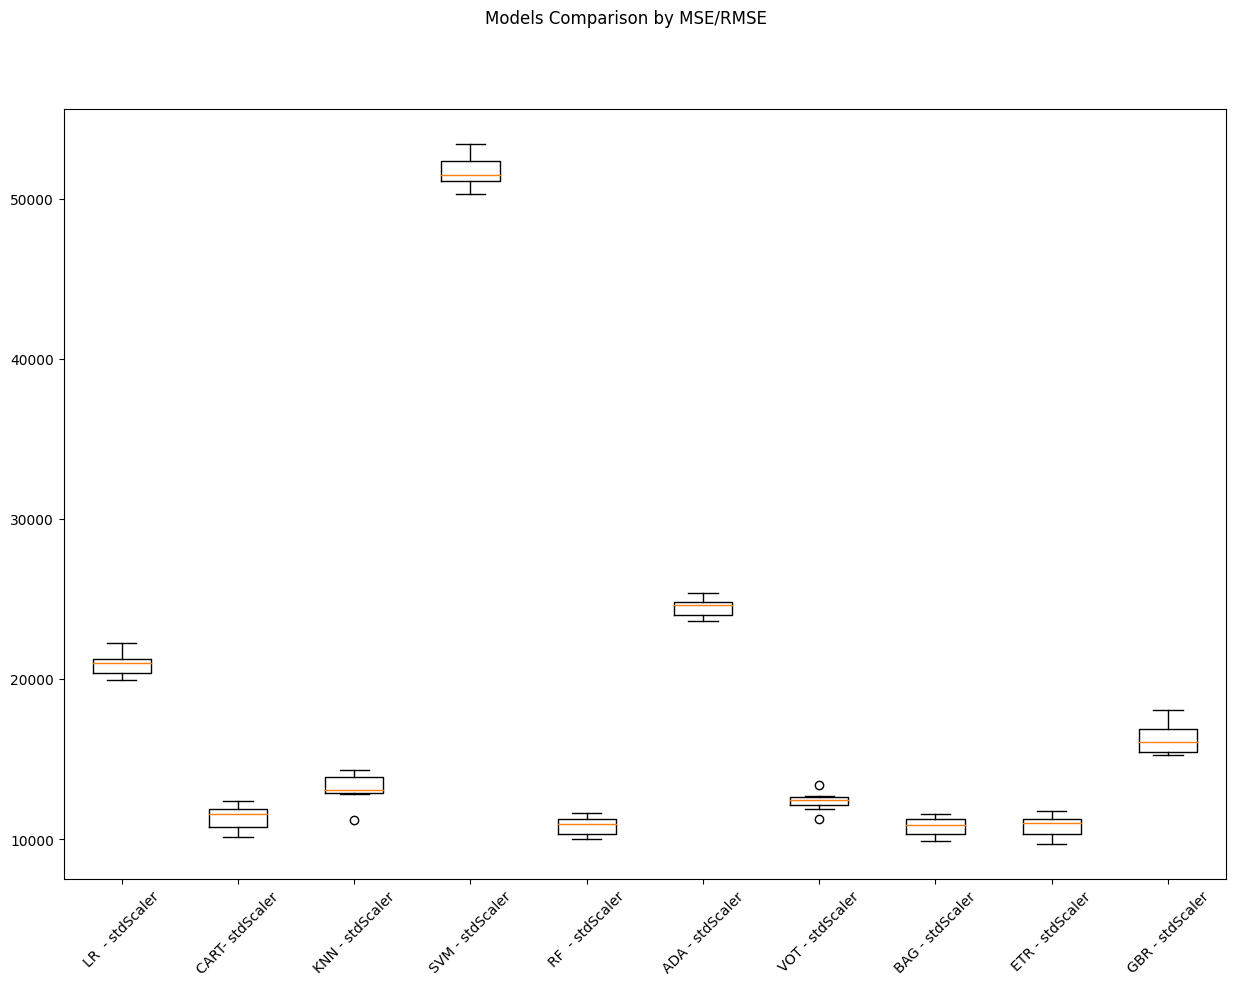

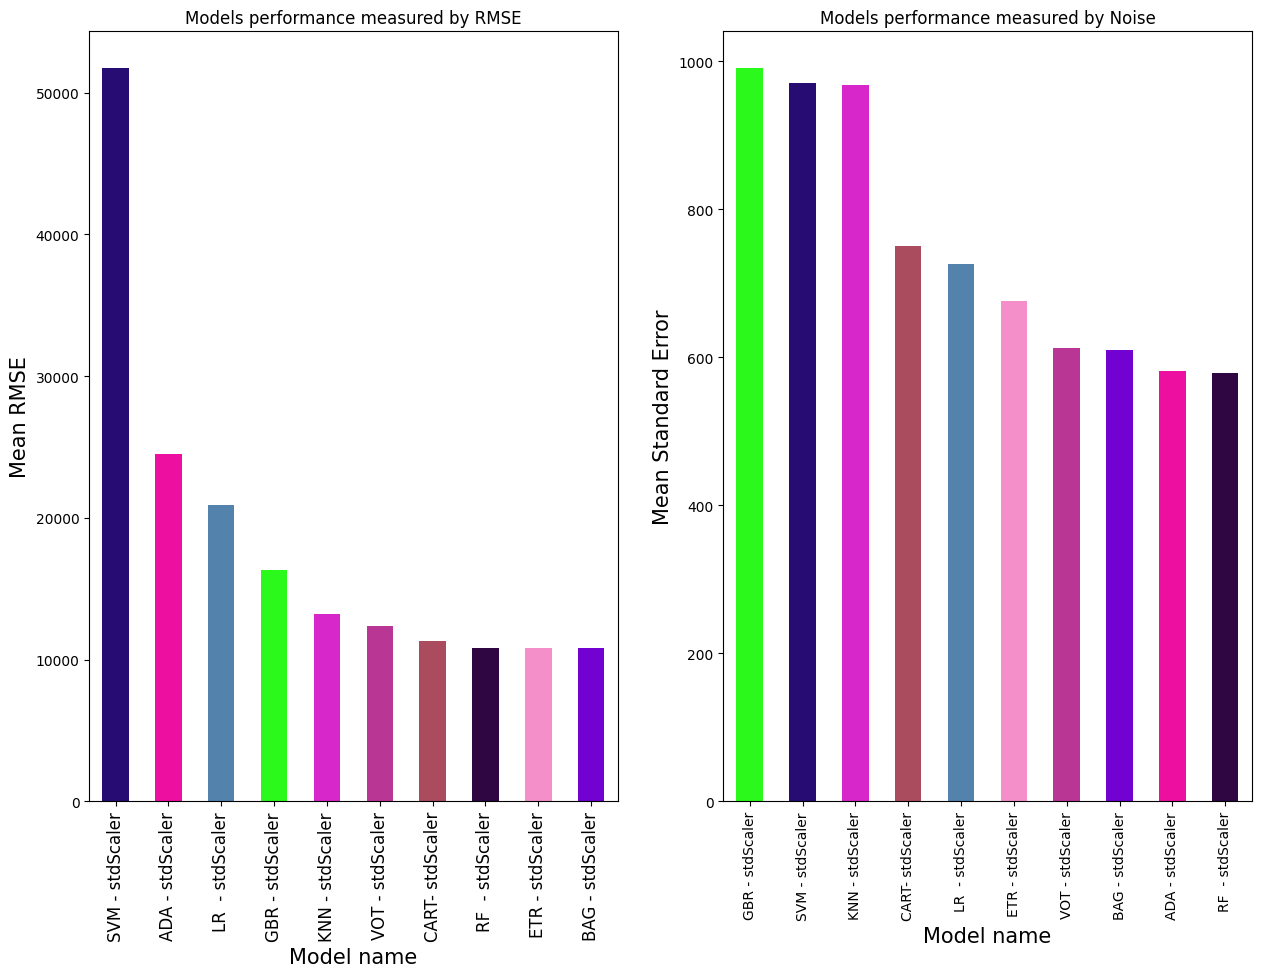

In [40]:
models_evaluator.generate_performance_report(names, results, report_df_std)

In [41]:
report_df

,MSE,STD,RMSE,color
NAME,,,,
ETR,1.169175e+08,687.842719,10790.939470,#f48fc9
RF,1.172404e+08,562.511319,10813.139236,#300642
BAG,1.173673e+08,593.967164,10817.322363,#7102d2
CART,1.292012e+08,751.731423,11341.784829,#aa4c5e
VOT,1.544941e+08,631.084447,12413.533181,#ba3695
KNN,1.689571e+08,999.674306,12959.850655,#d727ca
GBR,2.669600e+08,992.145068,16308.759965,#2bf81b
LR,4.375395e+08,714.272763,20905.246748,#5383ad
ADA,5.855757e+08,627.959852,24190.522473,#ec0fa0


In [42]:
report_df_minmax

,MSE,STD,RMSE,color
NAME,,,,
ETR - minMaxScaled,1.169175e+08,687.842719,10790.939470,#f48fc9
RF - minMaxScaled,1.172768e+08,560.105752,10814.948842,#300642
BAG - minMaxScaled,1.173754e+08,592.379575,10817.785288,#7102d2
CART - minMaxScaled,1.292012e+08,751.731423,11341.784829,#aa4c5e
VOT - minMaxScaled,1.551121e+08,601.600630,12439.861792,#ba3695
KNN - minMaxScaled,1.880157e+08,1031.365407,13673.038728,#d727ca
GBR - minMaxScaled,2.671526e+08,984.152864,16315.147243,#2bf81b
LR - minMaxScaled,4.375332e+08,714.593333,20905.085638,#5383ad
ADA - minMaxScaled,5.849893e+08,616.641129,24178.690238,#ec0fa0


In [43]:
report_df_std

,MSE,STD,RMSE,color
NAME,,,,
BAG - stdScaler,1.169625e+08,609.581821,10797.725754,#7102d2
ETR - stdScaler,1.174473e+08,676.310444,10816.185018,#f48fc9
RF - stdScaler,1.176634e+08,578.672082,10831.829216,#300642
CART- stdScaler,1.293273e+08,750.820788,11347.403825,#aa4c5e
VOT - stdScaler,1.536144e+08,612.426434,12378.989368,#ba3695
KNN - stdScaler,1.748452e+08,968.140383,13187.414103,#d727ca
GBR - stdScaler,2.669785e+08,991.081393,16309.390175,#2bf81b
LR - stdScaler,4.383118e+08,726.210263,20923.299077,#5383ad
ADA - stdScaler,5.998726e+08,580.992073,24485.405639,#ec0fa0


Avaliando os três cenários percebe-se que  eles tiveram resultados bastante parecidos, tendo elegido como os melhor modelos a `Arvore de Decisão`, `BaggingRegressor`, `ExtraTreeRegressor` e `RandomForestRegressor`. Em alguns casos pudemos notar que embora o valor da métrica fosse melhor para um desses modelos, nem sempre o valor de ruído se apresentava como o menor. Entretanto como o foco nesse projeto está no RMSE escolheremos esses 4 modelos baseados, pois em termos de RMSE foram os modelos que melhor apresentaram resultados.


### Ajuste de hiperparâmetros

o procedimento de ajuste de hiperparâmetros fora realizado utilizando o script  ****OptimizeModels.py**** presente na pasta Tuneling desse projeto. Nesta pasta temos também um arquivo com os parâmetros de cada modelo utilizado na otimização de hiperparâmetros asim como a classe ***ModelOtimizer.py*** foi criada para performar otimização do hiperparâmetros e gerar os modelo otimizados.

Logs ****OptimizeModels.py****:

```
****************************************************************************************************
==================== Making Tuneling of BAG-minMax model ====================
Performing  BAG-minMax model hyperparameter tuneling
BAG-minMax model hyperparameter tuneling Done!
best model found: Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                ('BAG',
                 BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                  max_samples=0.7, n_estimators=100,
                                  warm_start=True))])
best model params: {'BAG__bootstrap': True, 'BAG__bootstrap_features': False, 'BAG__max_features': 1.0, 'BAG__max_samples': 0.7, 'BAG__n_estimators': 100, 'BAG__oob_score': False, 'BAG__warm_start': True}
Saving model...
****************************************************************************************************
==================== Making Tuneling of ETR-minMax model ====================
Performing  ETR-minMax model hyperparameter tuneling
ETR-minMax model hyperparameter tuneling Done!
best model found: Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                ('ETR',
                 ExtraTreesRegressor(bootstrap=True, max_depth=100,
                                     max_features='sqrt', n_estimators=500,
                                     warm_start=True))])
best model params: {'ETR__bootstrap': True, 'ETR__criterion': 'mse', 'ETR__max_depth': 100, 'ETR__max_features': 'sqrt', 'ETR__min_samples_leaf': 1, 'ETR__min_samples_split': 2, 'ETR__n_estimators': 500, 'ETR__oob_score': False, 'ETR__warm_start': True}
Saving model...
****************************************************************************************************
==================== Making Tuneling of RF-minMax model ====================
Performing  RF-minMax model hyperparameter tuneling
RF-minMax model hyperparameter tuneling Done!
best model found: Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                ('RF',
                 RandomForestRegressor(max_features='sqrt', n_estimators=800))])
best model params: {'RF__bootstrap': True, 'RF__max_depth': None, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 800}
Saving model...
****************************************************************************************************
==================== Making Tuneling of CART-minMax model ====================
Performing  CART-minMax model hyperparameter tuneling
CART-minMax model hyperparameter tuneling Done!
best model found: Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                ('CART',
                 DecisionTreeRegressor(max_features=3, min_samples_leaf=3,
                                       min_samples_split=10))])
best model params: {'CART__criterion': 'mse', 'CART__max_depth': None, 'CART__max_features': 3, 'CART__min_samples_leaf': 3, 'CART__min_samples_split': 10}
Saving model...
Model saved !
Tuneling completed successfully ! 
```



## Competição entre os modelos optimizdos

Uma vez realizado a otimização de hiperparâmetros dos 4 melhores modelos, vamos então coloca-lo em um competição final para assim selecionar o melhor modelo entre eles:

In [44]:
from joblib import load, dump

bag_optimized = load(MODELS_PATH + "BAG-minMax.joblib")
cart_optimized = load(MODELS_PATH + "CART-minMax.joblib")
etr_optimized = load(MODELS_PATH  + "ETR-minMax.joblib")
rf_optimized = load(MODELS_PATH + "RF-minMax.joblib")



In [45]:
report_df

,MSE,STD,RMSE,color
NAME,,,,
ETR,1.169175e+08,687.842719,10790.939470,#f48fc9
RF,1.172404e+08,562.511319,10813.139236,#300642
BAG,1.173673e+08,593.967164,10817.322363,#7102d2
CART,1.292012e+08,751.731423,11341.784829,#aa4c5e
VOT,1.544941e+08,631.084447,12413.533181,#ba3695
KNN,1.689571e+08,999.674306,12959.850655,#d727ca
GBR,2.669600e+08,992.145068,16308.759965,#2bf81b
LR,4.375395e+08,714.272763,20905.246748,#5383ad
ADA,5.855757e+08,627.959852,24190.522473,#ec0fa0


In [46]:
optmized_models = [ ('BAG ', bag_optimized), ('CART', cart_optimized) , ('ETR ',etr_optimized), ('RF  ', rf_optimized)]

#get colors
pallete_opts =[]
for name, _  in optmized_models:
  pallete_opts.append(report_df.loc[name]['color'])

In [47]:
pallete_opts

['#7102d2', '#aa4c5e', '#f48fc9', '#300642']

In [48]:

model_evaluator_opts =  RegressionModelsEvaluator(partitions_on_data=7, test_size=0.20, color_palette=pallete_opts)
names, results_opts, report_df_opts= model_evaluator_opts.evaluate_models(optmized_models, salaries_df_preprocessed, 'Salary')

BAG 			   MSE 118133253.22	 | STD:	 560.81	 | RMSE: 	 10854.43	 |
CART			   MSE 397244375.03	 | STD:	 3059.74	 | RMSE: 	 19694.73	 |
ETR 			   MSE 114300204.56	 | STD:	 846.56	 | RMSE: 	 10657.56	 |
RF  			   MSE 115453211.66	 | STD:	 773.29	 | RMSE: 	 10717.05	 |


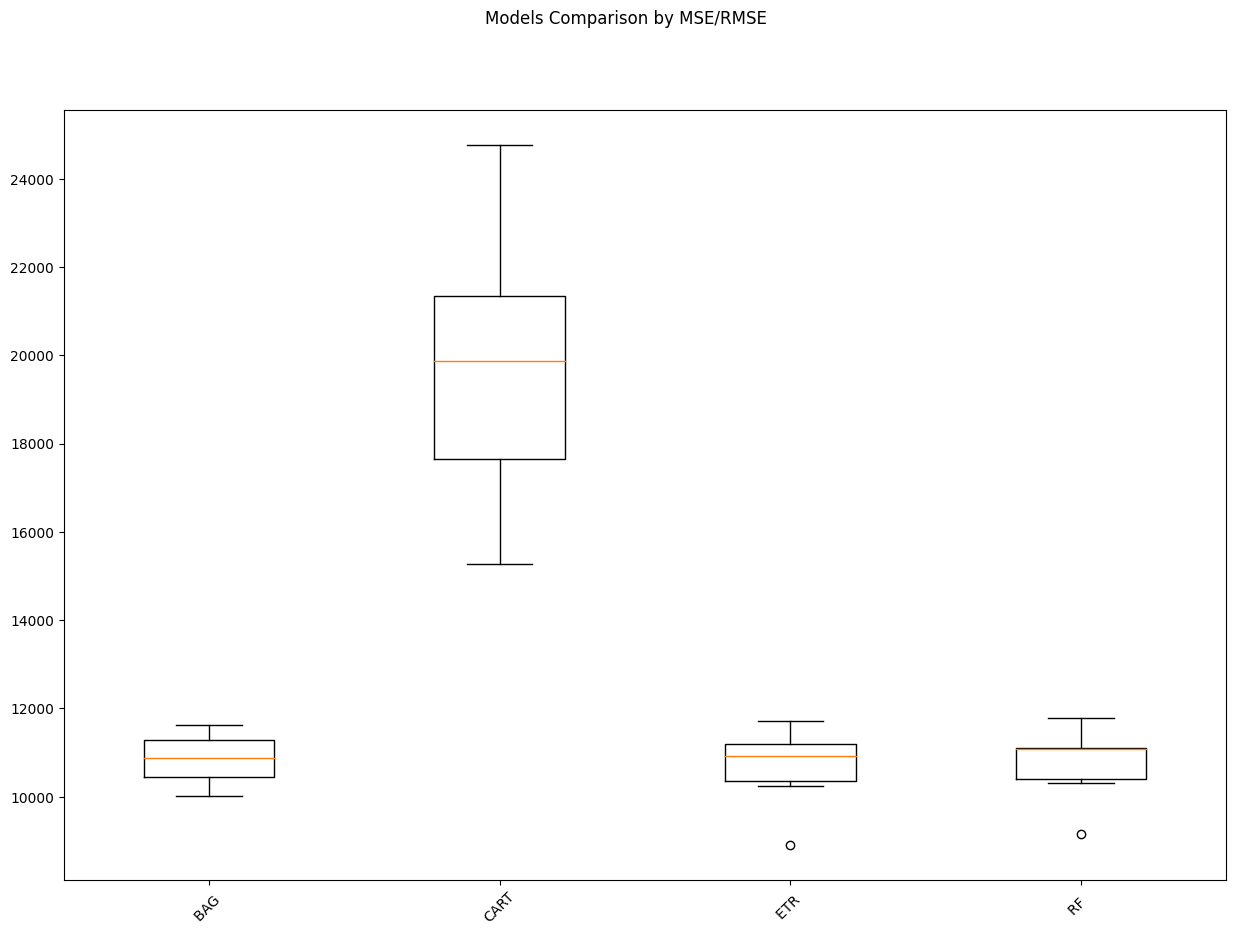

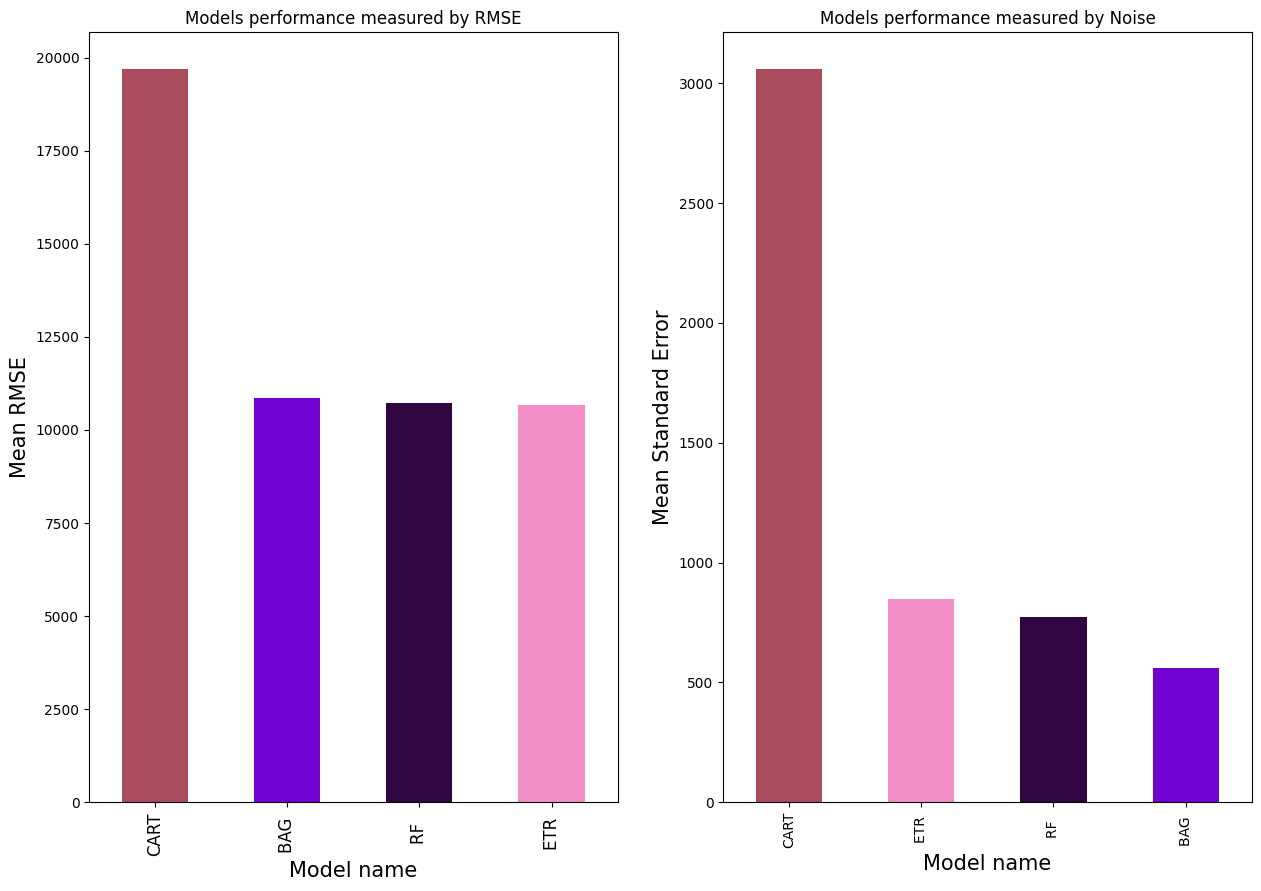

In [49]:
models_evaluator.generate_performance_report(names, results_opts, report_df_opts)

In [50]:
report_df_opts

,MSE,STD,RMSE,color
NAME,,,,
ETR,1.143002e+08,846.563736,10657.557619,#f48fc9
RF,1.154532e+08,773.286925,10717.053652,#300642
BAG,1.181333e+08,560.810170,10854.434355,#7102d2
CART,3.972444e+08,3059.735334,19694.730125,#aa4c5e


Como visto nos relátorios acima, a o modelo que melhor se saio bem foi o `ExtraTreeRegressor`, sendo asssim ele será escolhido para realização da etapa de holdout

## Holdout

In [51]:
from sklearn.metrics import  mean_squared_error

etr_trained =  etr_optimized.fit(X_train, y_train)

In [52]:
y_preds = etr_trained.predict(X_test)

In [53]:

rmse = np.sqrt(mean_squared_error(y_test, y_preds) )
print(f"RMSE: {rmse}")

RMSE: 11462.92395754824


Com isso temos uma avaliação final do modelo. É esperado que seja um pouco pior do que no treino já ue no treino haviam-se mais dados.

## Treino Final e peparaçao para produção

Assim para concluir o trabalho treinaremos o modelo com todos os dados disponíveis para que assim ele possa ser implantado em produção e ser disponibilizado para uso pelo gestor na estimação de perfis com salário adequados ao orçamento do projeto.

In [54]:
etr_optimized_prod= load(MODELS_PATH  + "ETR-minMax.joblib")

features = salaries_df_preprocessed.drop(['Salary'], axis = 1)
label = salaries_df_preprocessed['Salary']
etr_optimized_prod = etr_optimized_prod.fit(features,label)

dump( etr_optimized_prod, MODELS_PATH + 'ETR_prod.joblib')

['../Models/ETR_prod.joblib']

## Conclusões

A partir desse trabalho pode-se implementar todo o ciclo de desenvolvimento de um um modelo de machine learning e observar na prática todos os desafio que desenvolver um modelo de ML de fato envolve. Obtivemos um modelo com  desempenho satisfatório e que ainda assim pode ser melhorado, como exemplo através pela obtenção de mais dados, uma das ações que mais corroboram para a melhora de um modelo. 

Outro fato interessante é que o algorítmo RandomForest performou quase que tão bem como o ExtraTreeRegressor, o que é completamente esperado
Já que o modelo de ExtraTree é uma versão melhorada do RandomForest. 

Por último vale observar que nesse caso, os modelo de ensemble perfomaram melhor em todo os casos, tendo sobrado apenas um modelo comum (DEcisionTree) entre os não-ensenble, entretanto mesmo assim esse 
modelo demonstrou ter muito mais ruído do que os outro modelos de Ensemble que competiu com ele na segunda etapa.

Assim sendom, temos como resultado a criação de um modelo pront para ser implantado em produção e monitorado pela equipe de operações e o gestor terá uma ferramenta mais precisa na hora traçar qual perfil mais se enquandra no seu budget e melhor atende as necessidade do projeto.